In [1]:
import pandas as pd, networkx as nx
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import trace_analysis
import os
import plots_analysis

Distribution

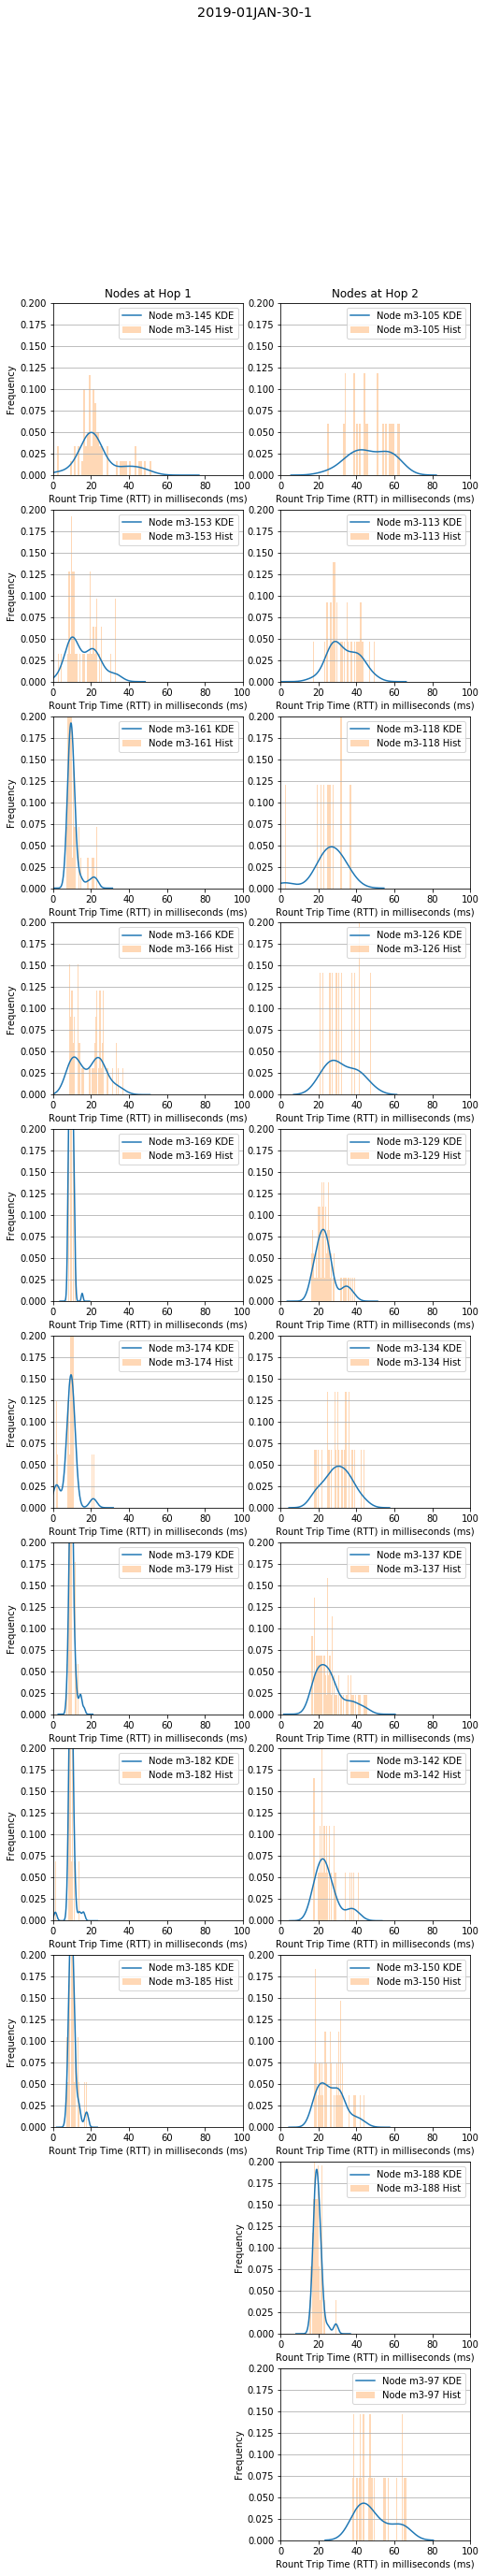

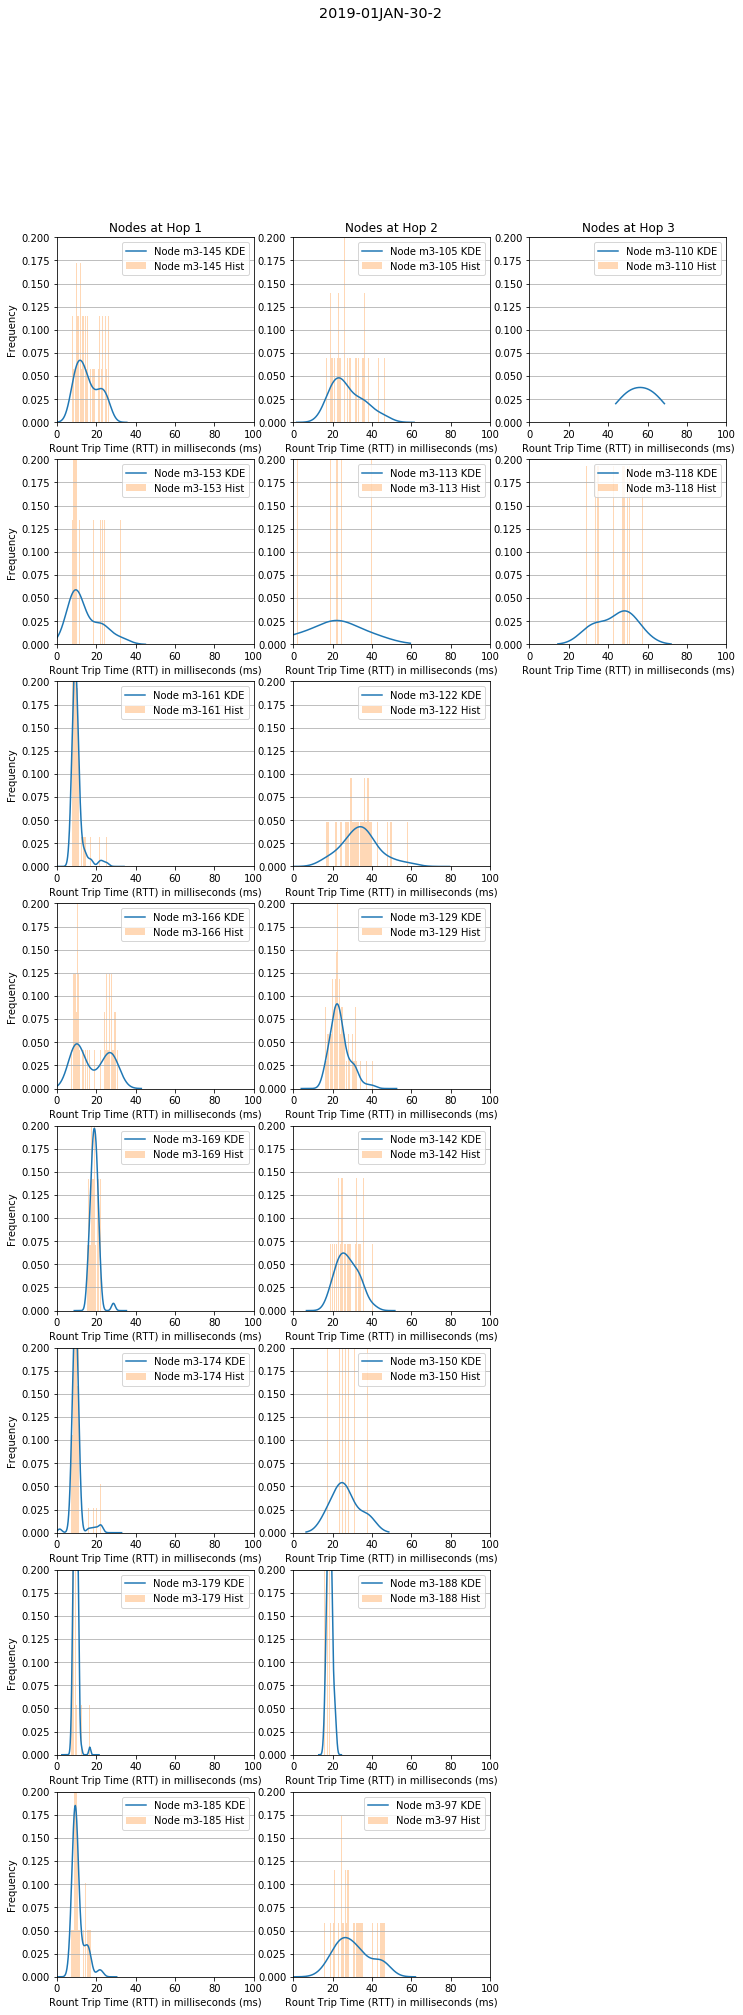

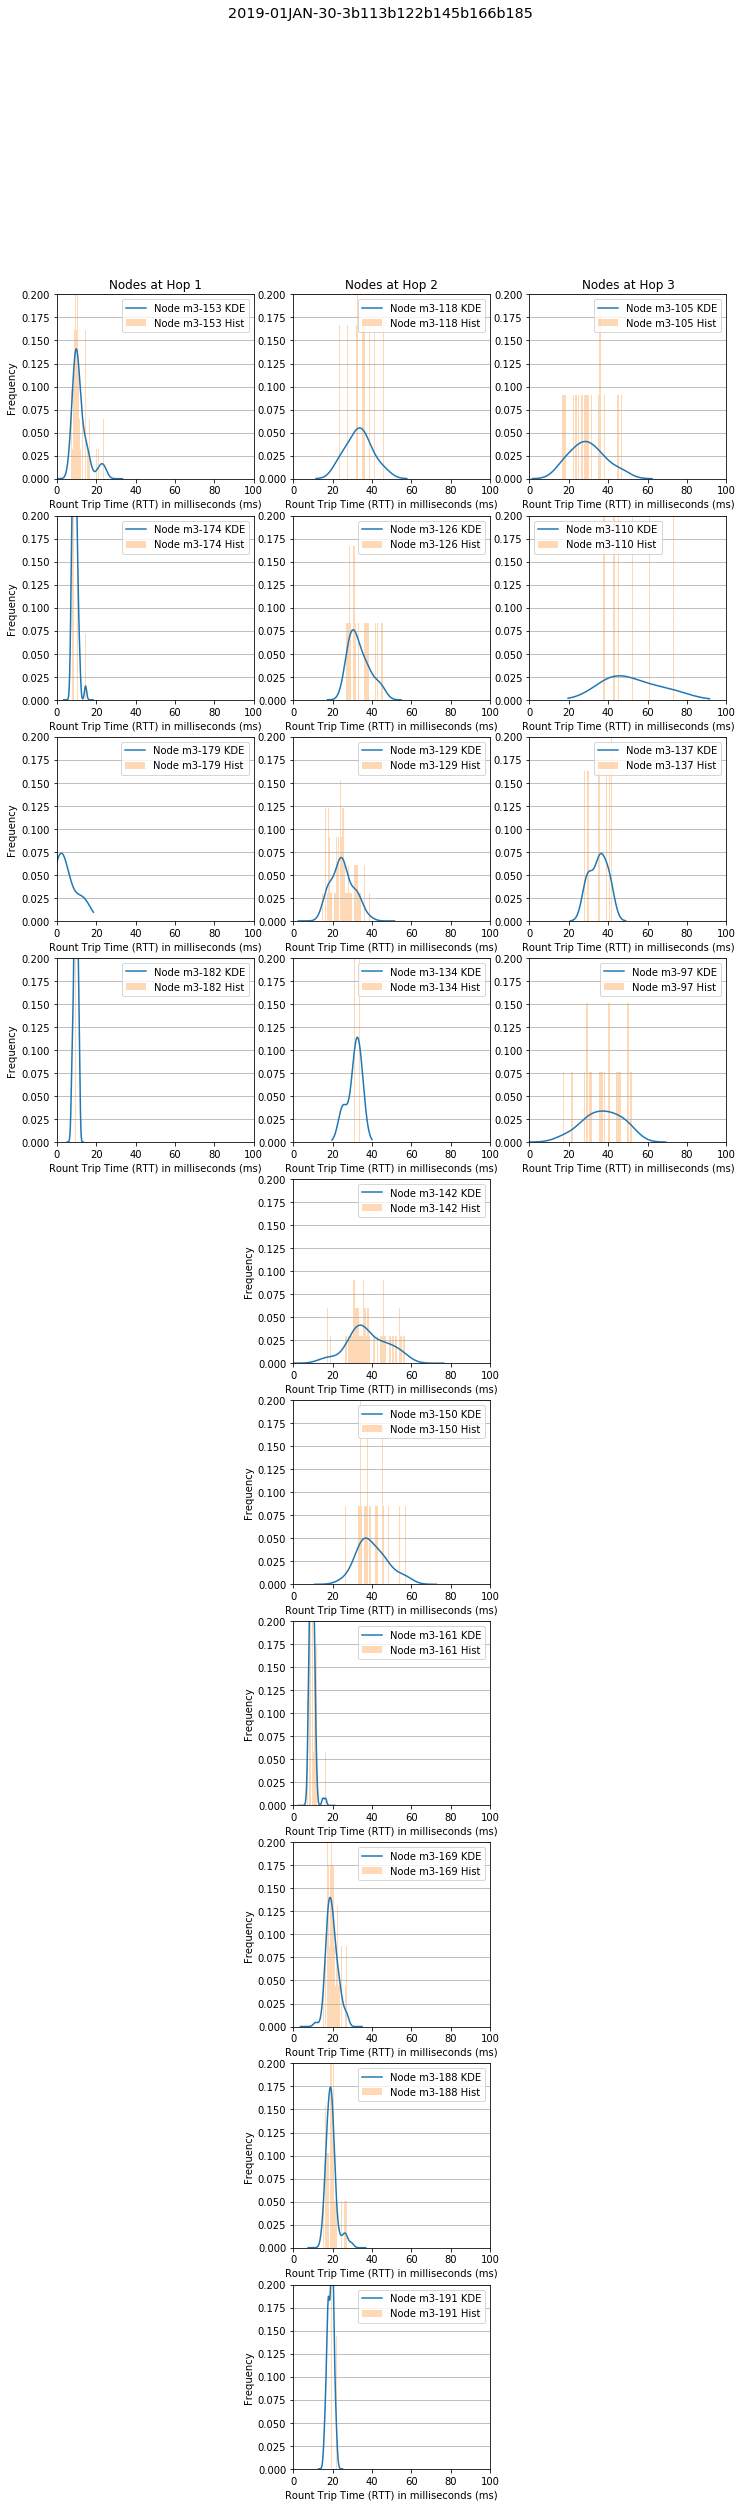

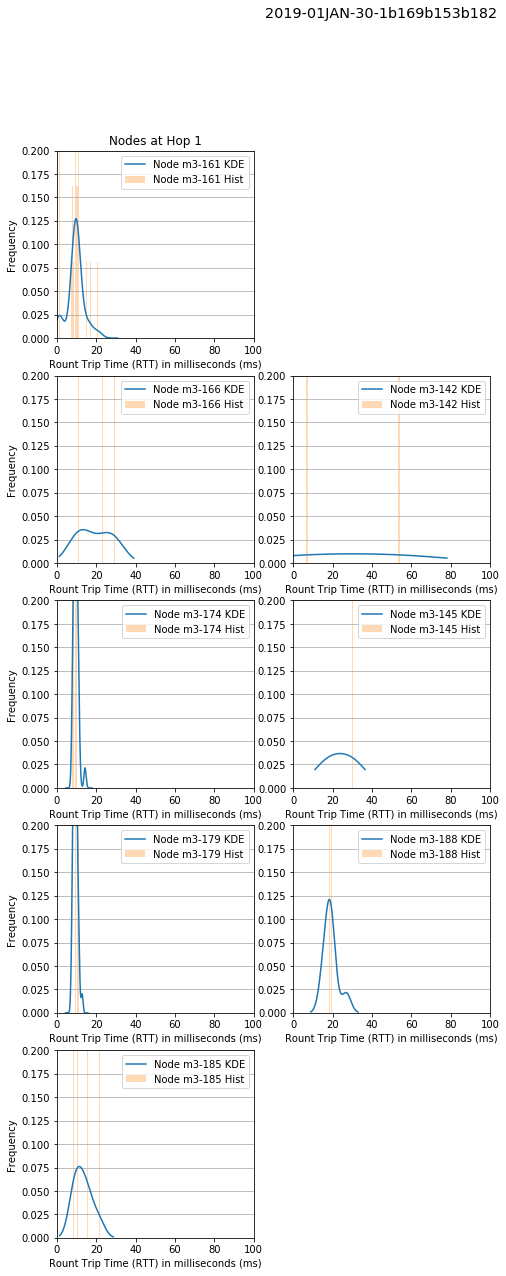

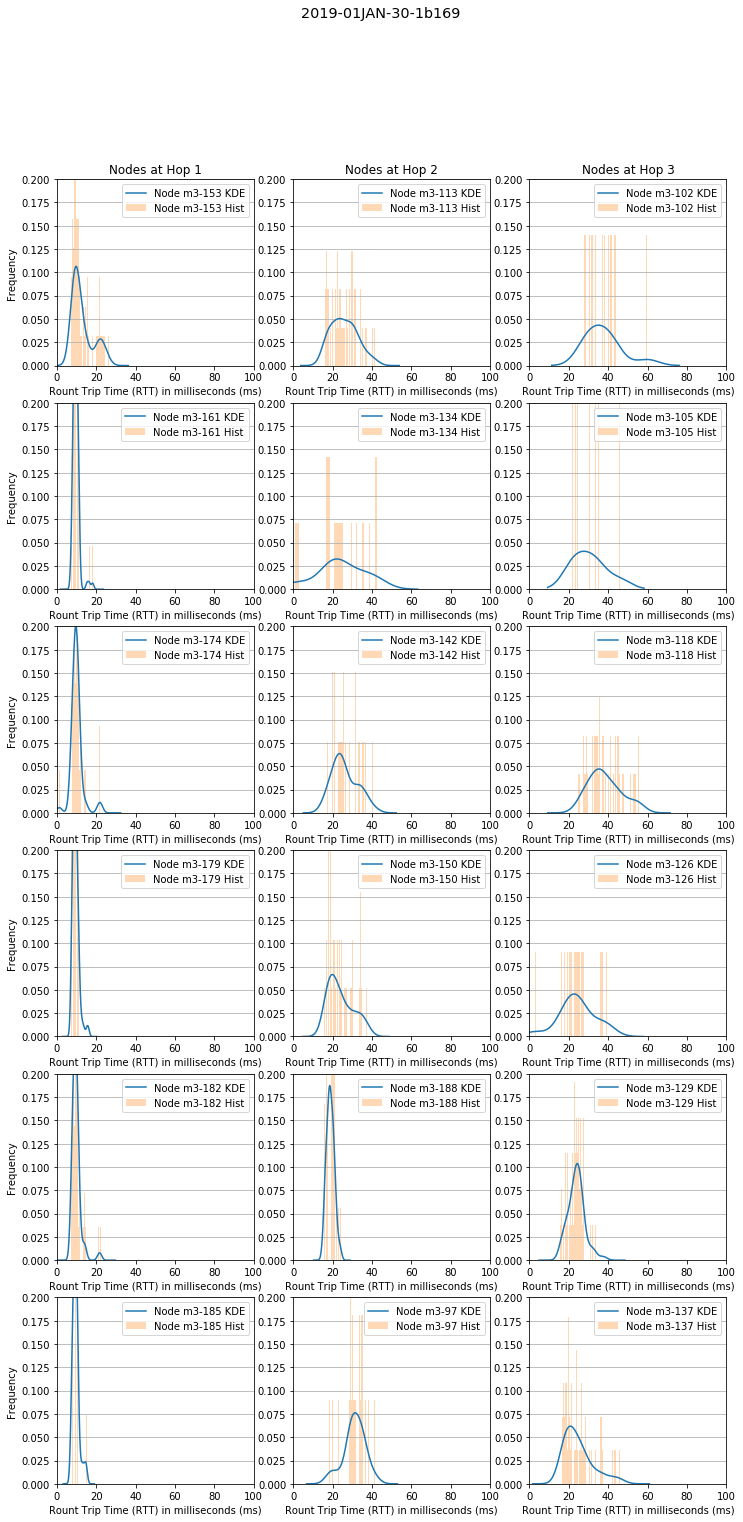

In [2]:
plots = [(os.getcwd() + '/traces/', '2019-01JAN-30-1'), 
         (os.getcwd() + '/traces/', '2019-01JAN-30-2'),
         (os.getcwd() + '/traces/', '2019-01JAN-30-3b113b122b145b166b185'),
         (os.getcwd() + '/traces/', '2019-01JAN-30-1b169b153b182'),
         (os.getcwd() + '/traces/', '2019-01JAN-30-1b169')]

for row in plots:
    nodes, packets_node = trace_analysis.process_iotlab_node_by_node2(row[0], row[1])
    clean = trace_analysis.separate_outliers_by_node(packets_node)
    plots_analysis.plot_histograms_hops_nodes(nodes, clean, 100, 0.2, row[1])

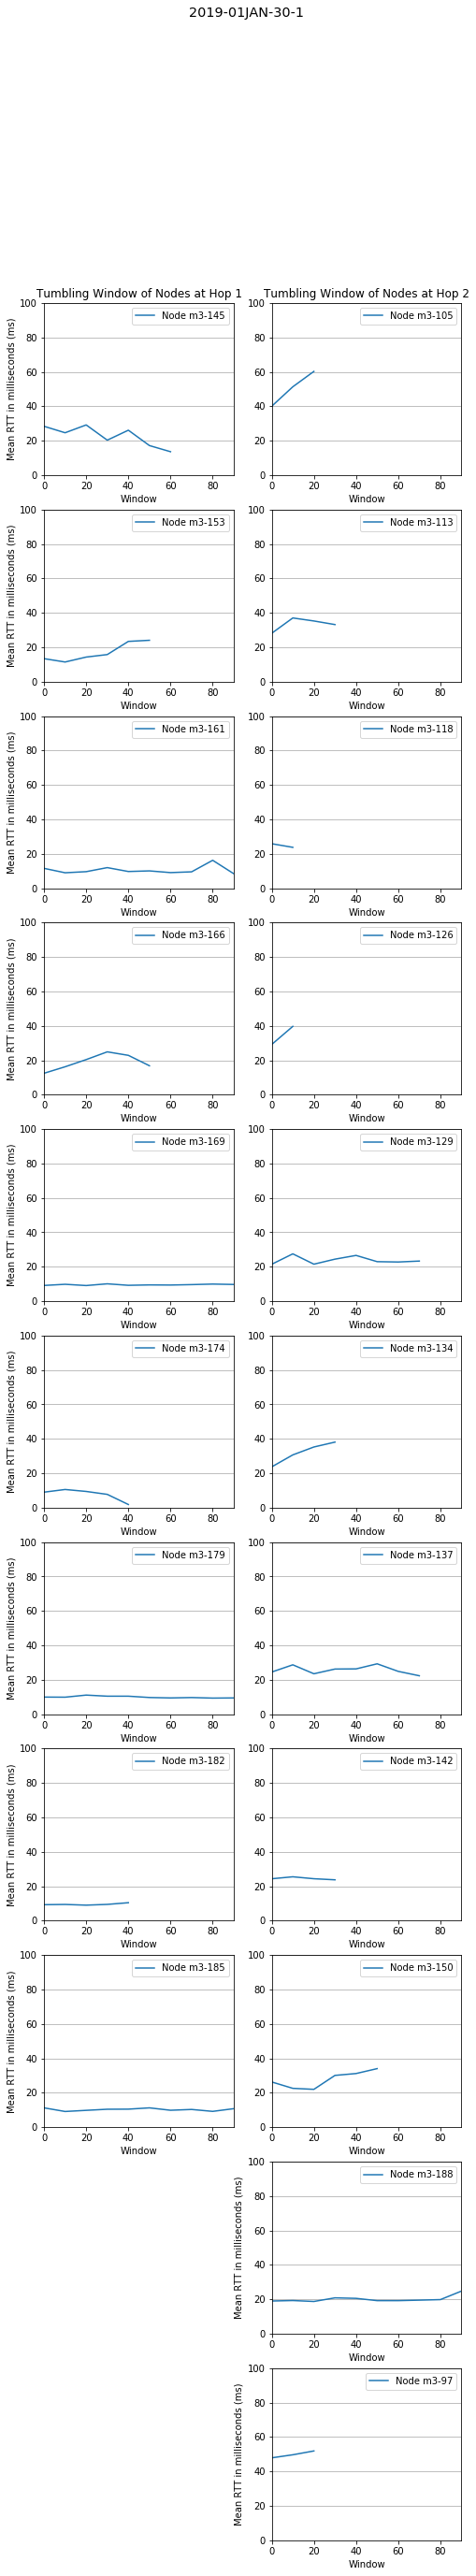

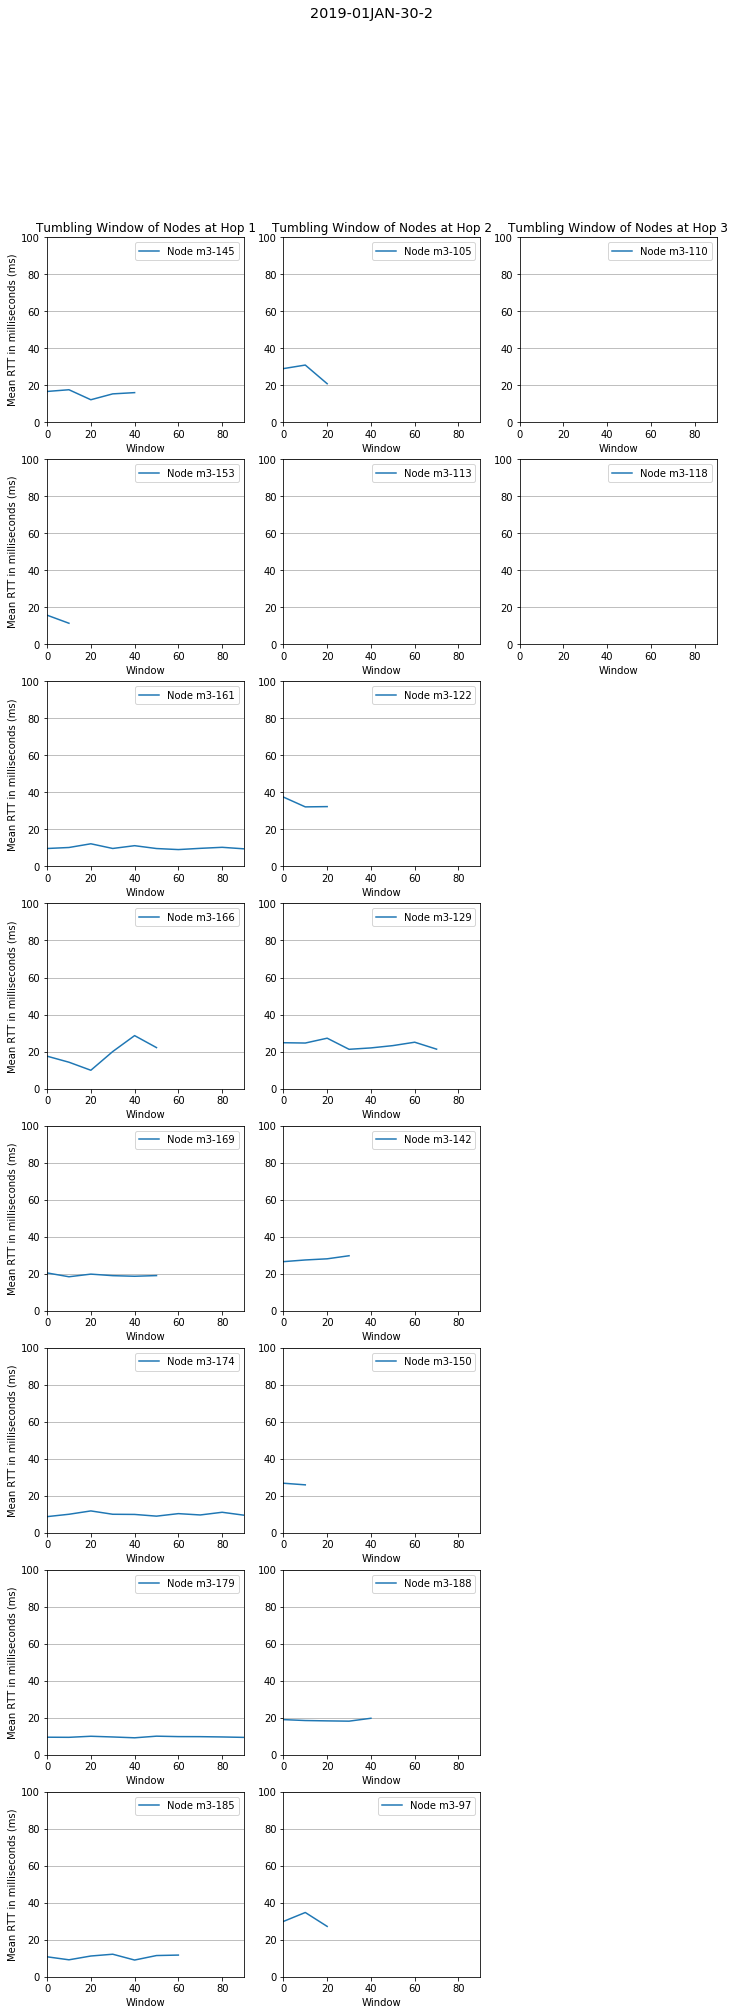

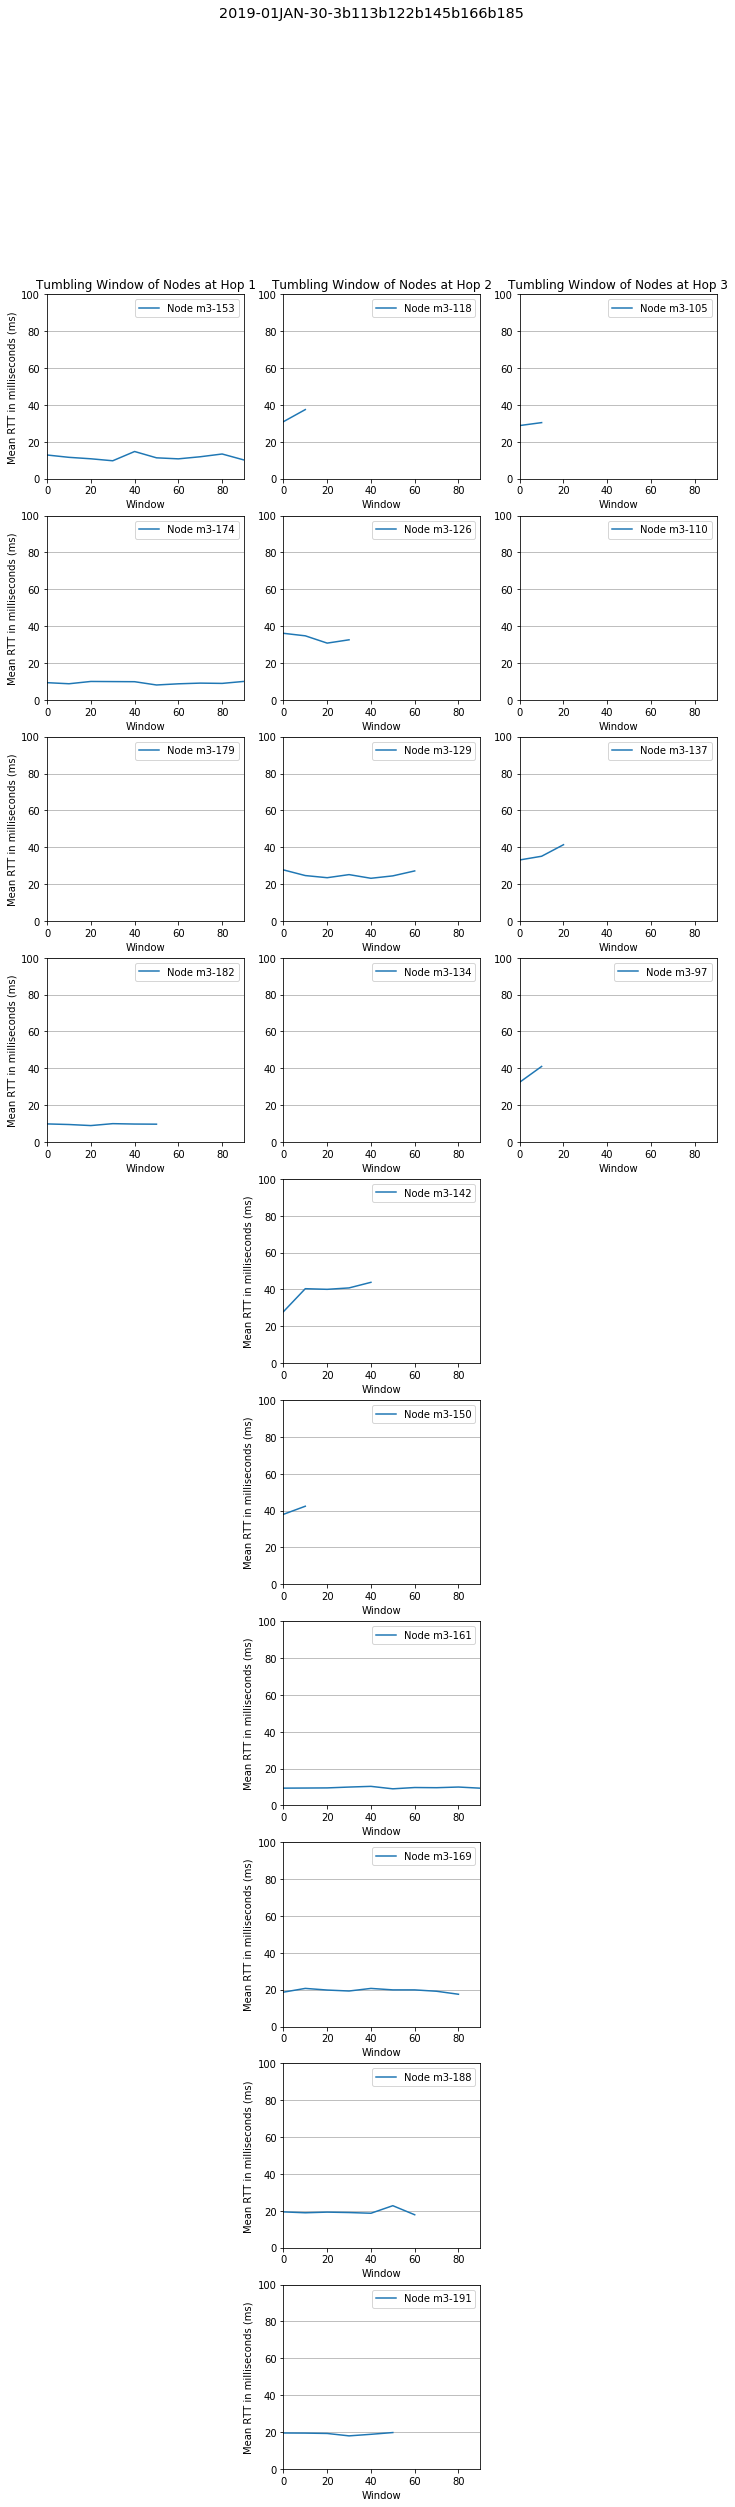

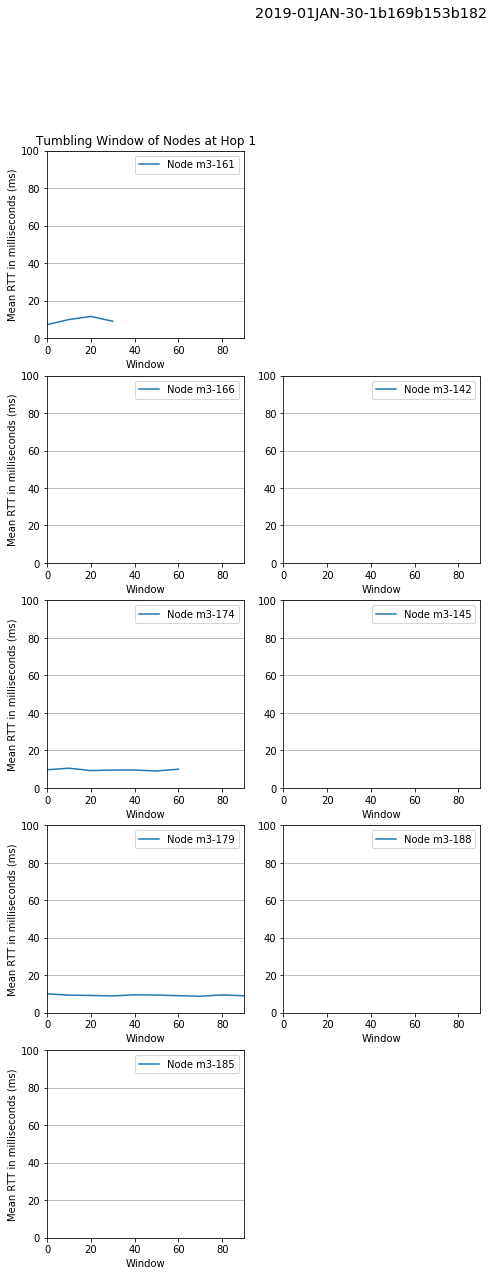

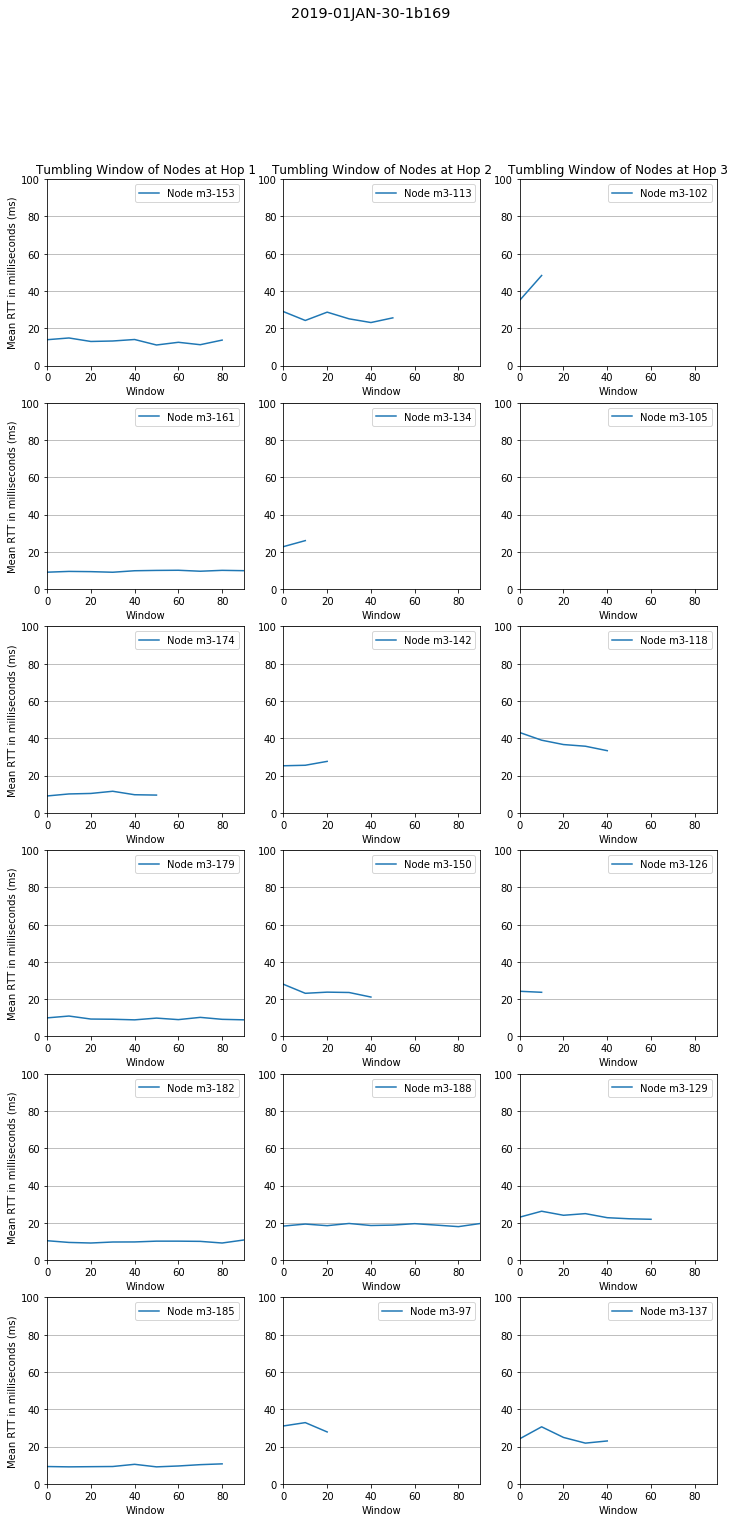

In [3]:
for row in plots:
    nodes, packets_node = trace_analysis.process_iotlab_node_by_node2(row[0], row[1])
    clean = trace_analysis.separate_outliers_by_node(packets_node)
    plots_analysis.plot_tumbling_windows_hops_nodes(nodes, clean, 90, 100, row[1], 10)


Outliers => points our of mean-2std <= x(t) <= mean + 2std

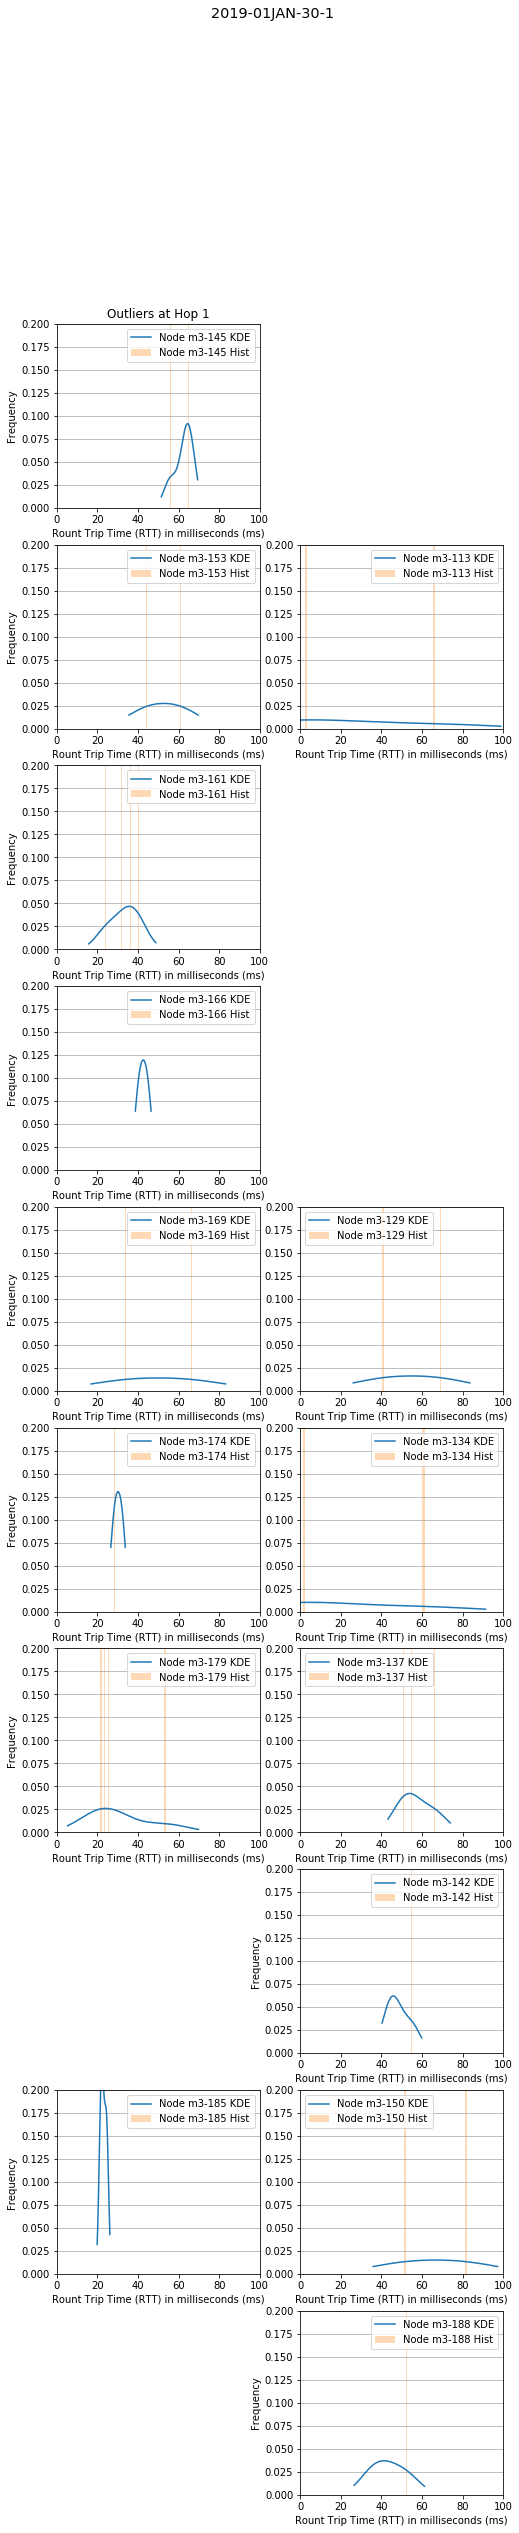

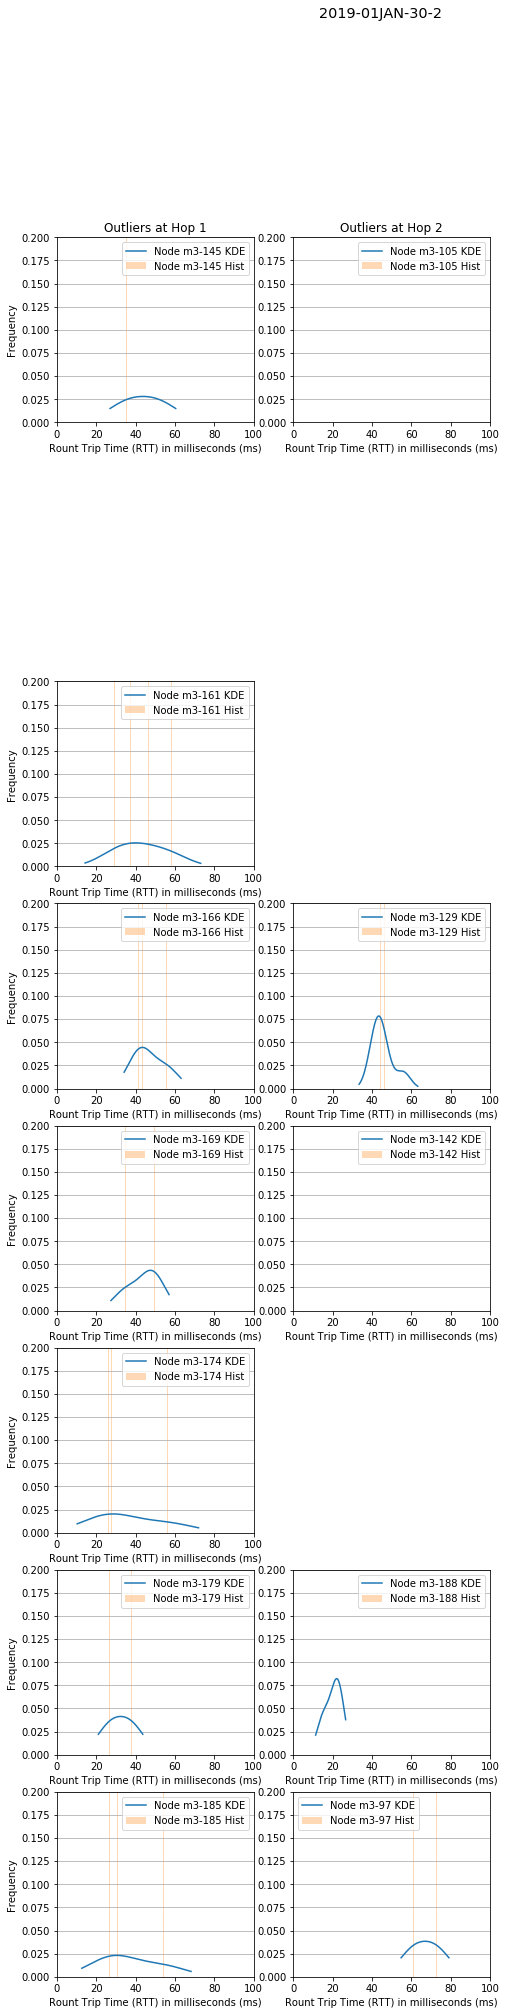

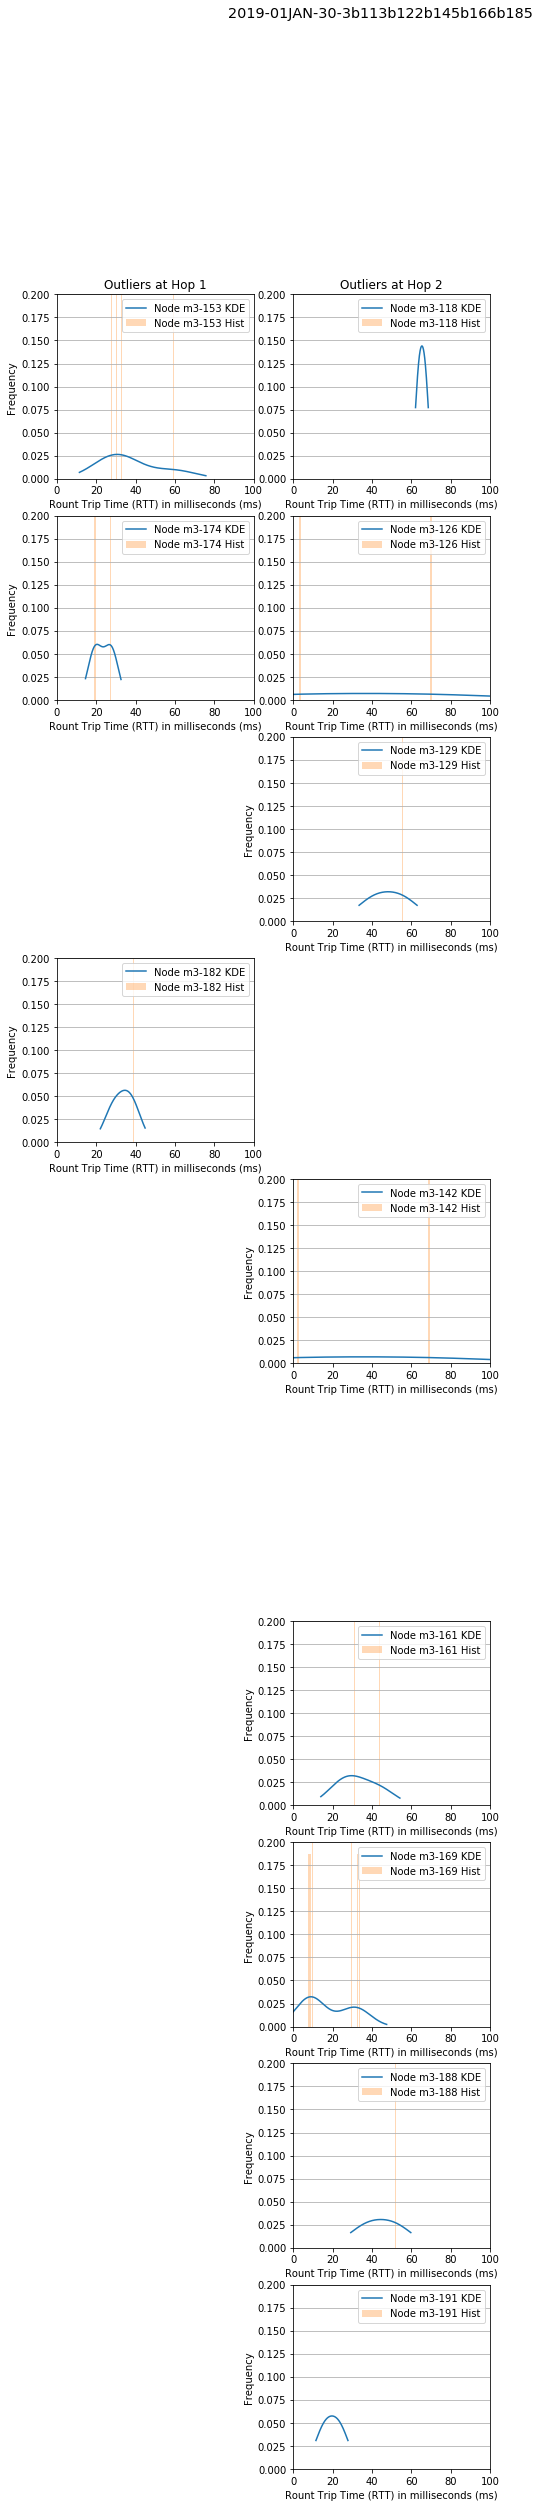

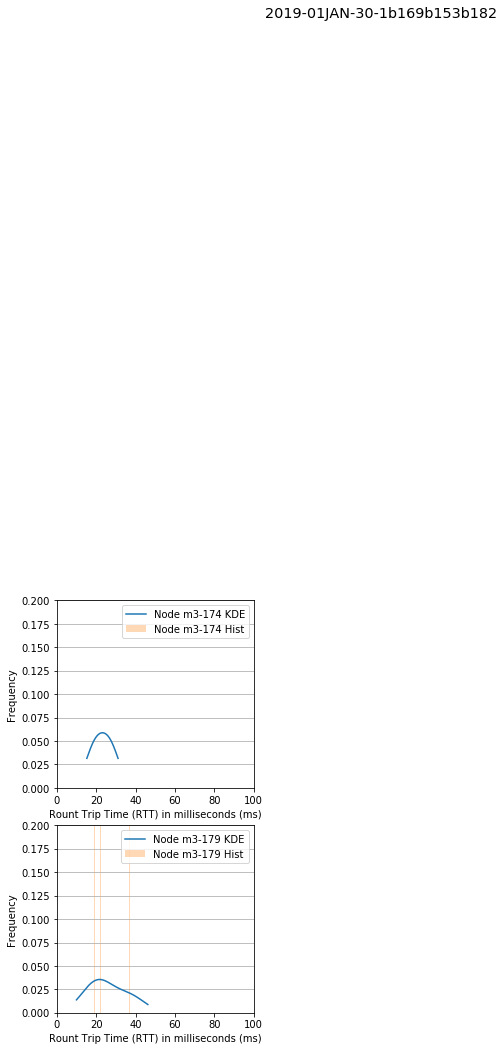

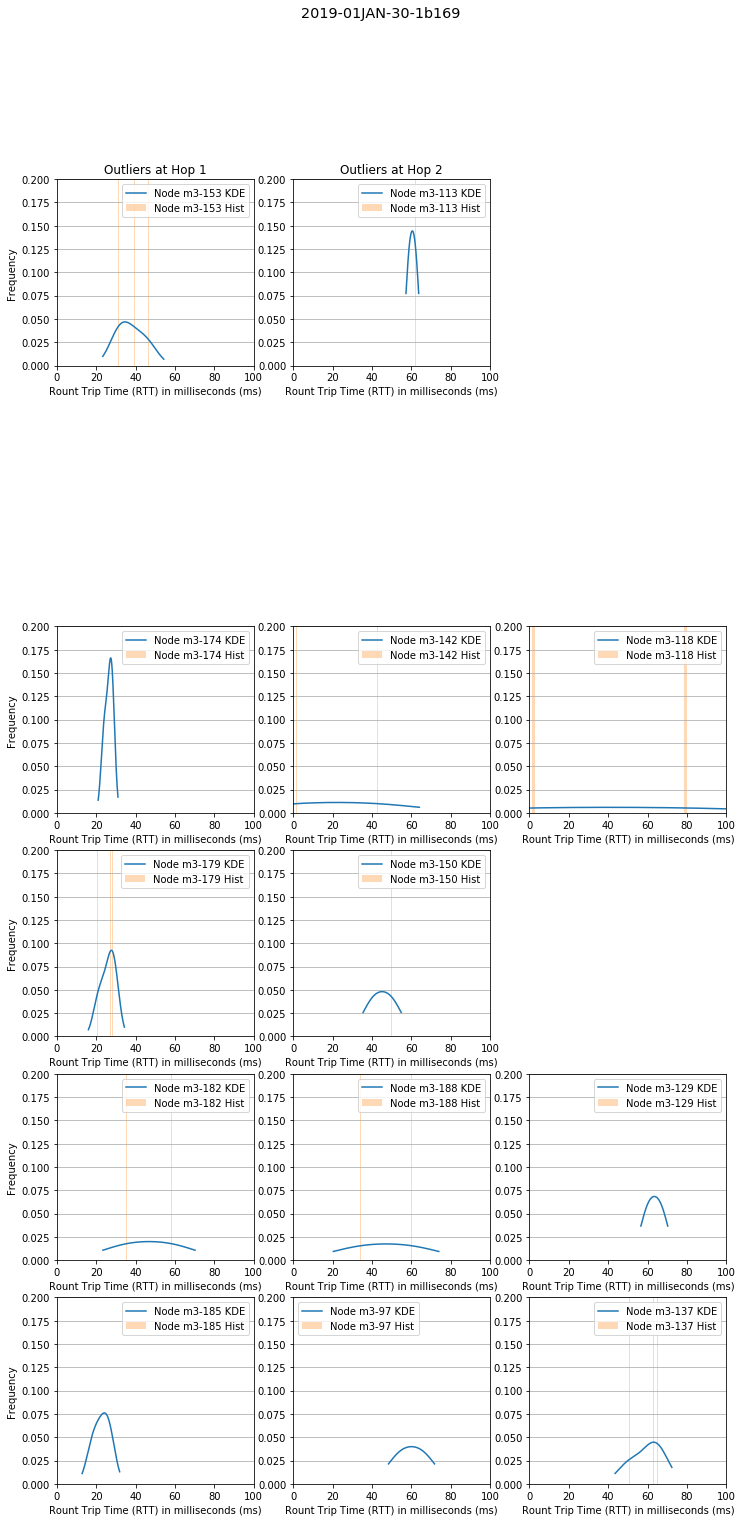

In [3]:
for row in plots:
    nodes, packets_node = trace_analysis.process_iotlab_node_by_node2(row[0], row[1])
    outliers = trace_analysis.compute_outliers_by_node(packets_node)
    plots_analysis.plot_histograms_outliers_hops_nodes(nodes, outliers, 100, 0.2, row[1])

IQR outliers

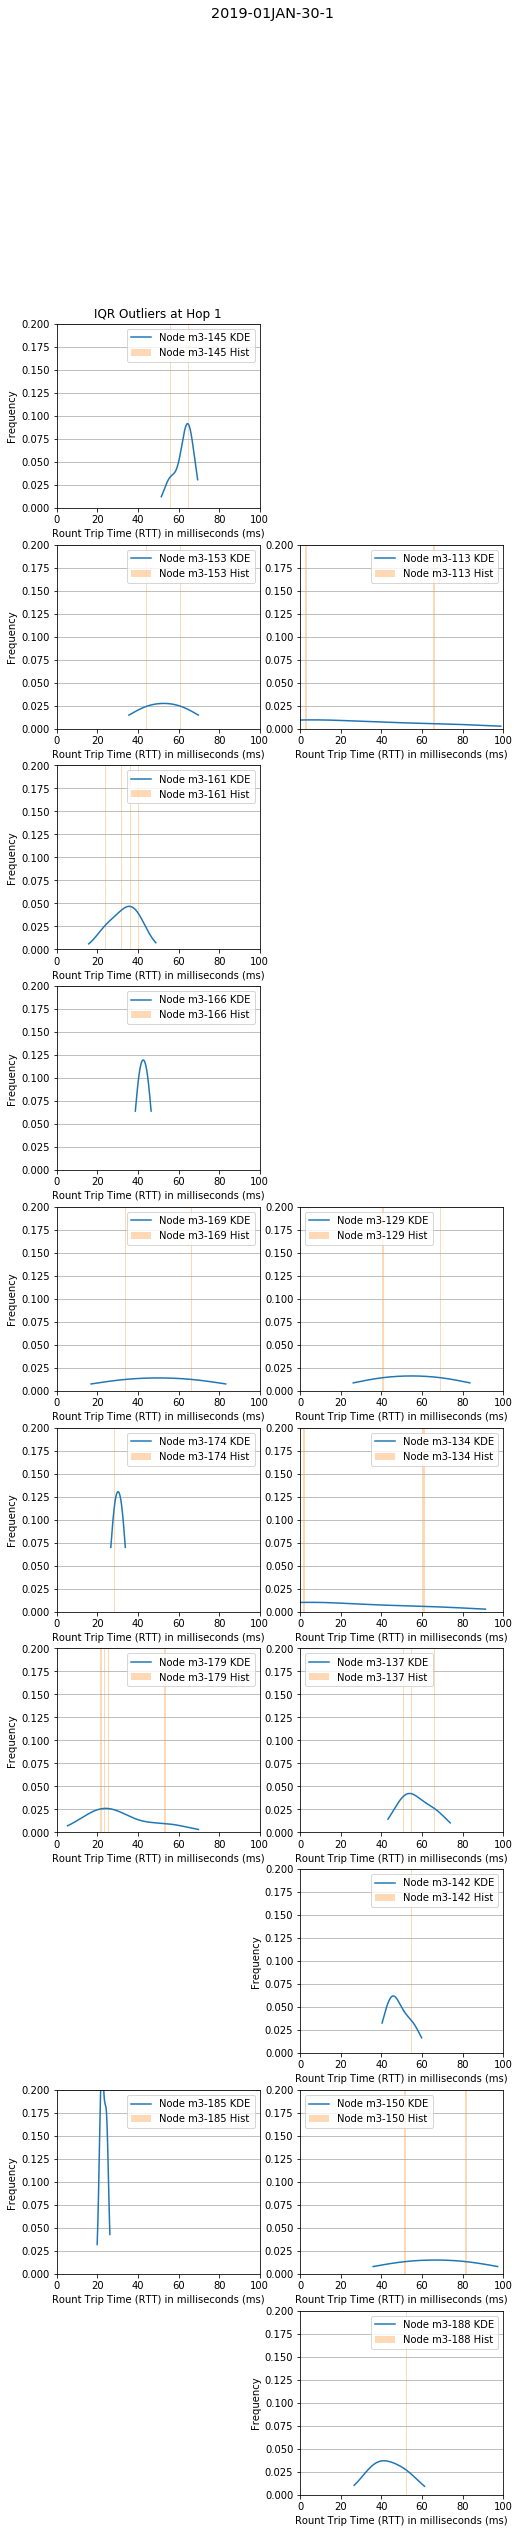

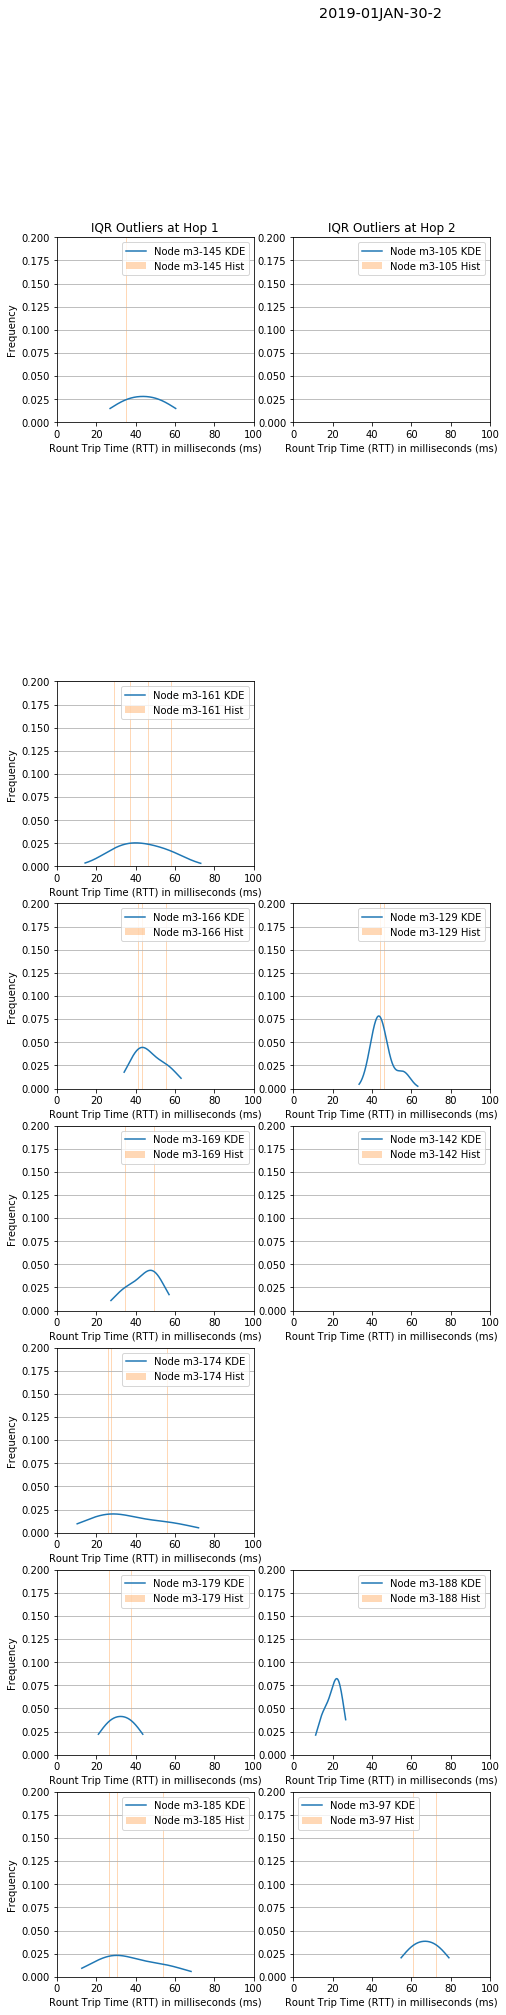

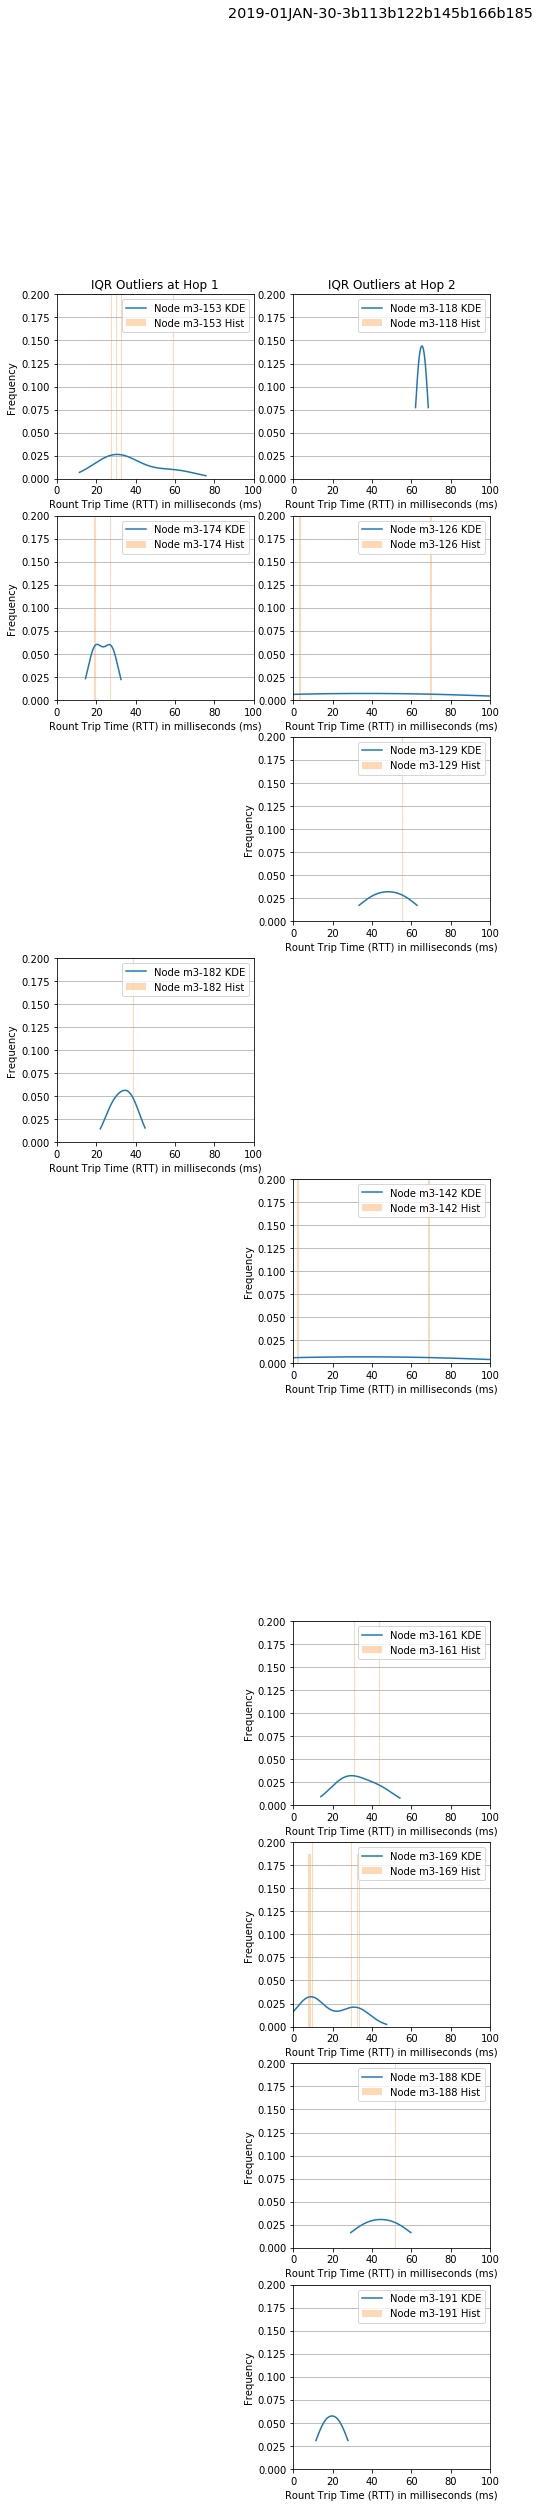

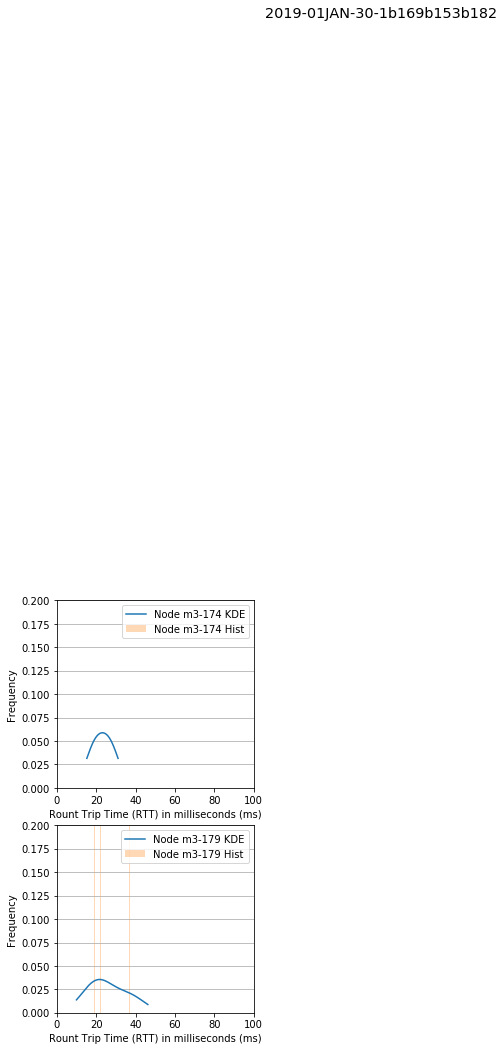

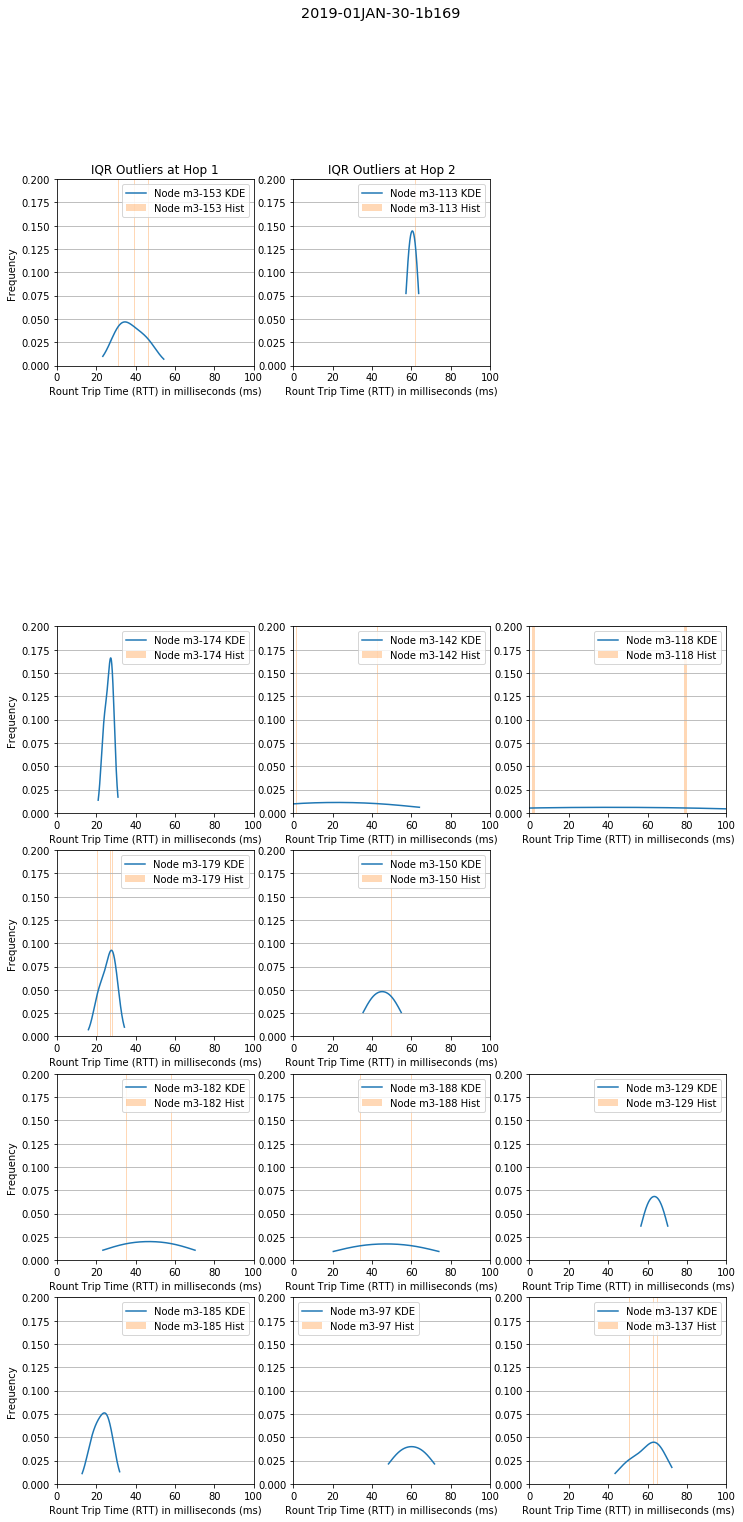

In [4]:
for row in plots:
    nodes, packets_node = trace_analysis.process_iotlab_node_by_node2(row[0], row[1])
    iqr_outliers = trace_analysis.compute_outliers_by_node(packets_node)
    plots_analysis.plot_histograms_iqr_outliers_hops_nodes(nodes, iqr_outliers, 100, 0.2, row[1])

# 1st Trace of Normal Network
## All nodes operating
Parse the 1st trace file with 200 packets over a network without any attacker.

In [3]:
hop_nodes1 = trace_analysis.process_iotlab_aggregated(os.getcwd() +'/traces/', '2019-01JAN-30-1')
std_values1, outliers1 = trace_analysis.separate_outliers(hop_nodes1)

../trace_analysis.py:214: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)


In [4]:
hop_nodes1.keys()

Int64Index([1, 2], dtype='int64')

Produce Histogram of delay depending on the hop-distance from the root

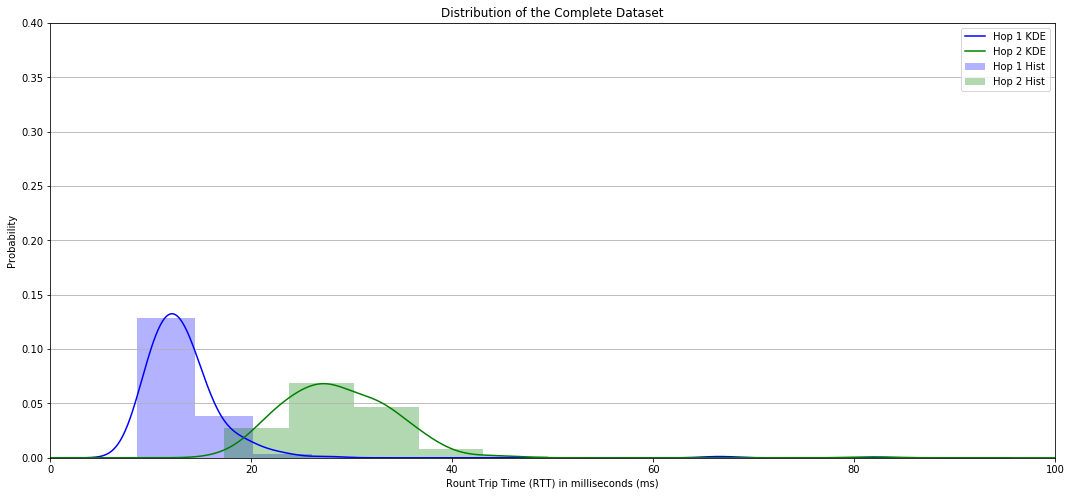

In [5]:
color = ['', 'blue', 'green', 'red']

fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes1.keys():
    hop_nodes1[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes1[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Complete Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Considering the clean data, produce a histogram of delay depending on the hop-distance from the root 

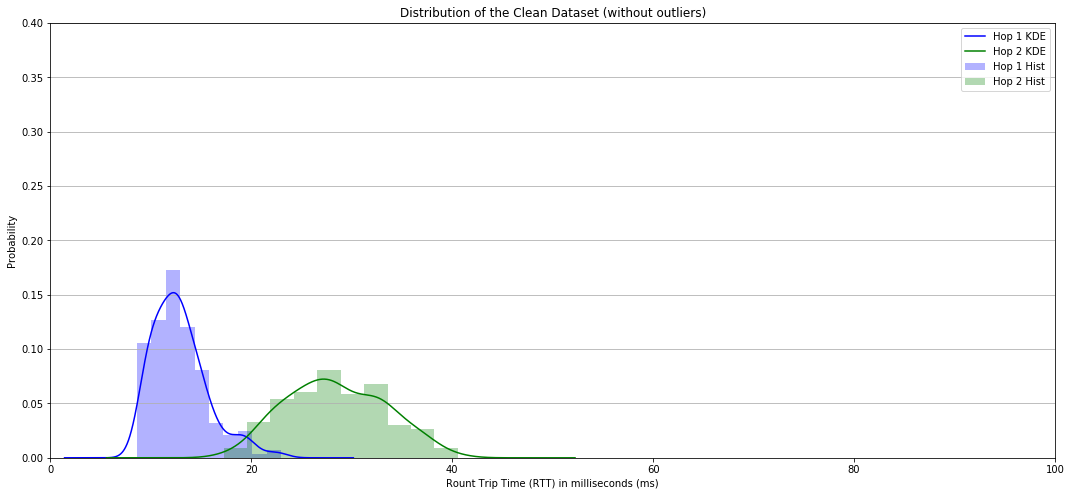

In [6]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in std_values1.keys():
    std_values1[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    std_values1[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset (without outliers)')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Produce a histogram of the outliers depending on the hop-distance from the root 

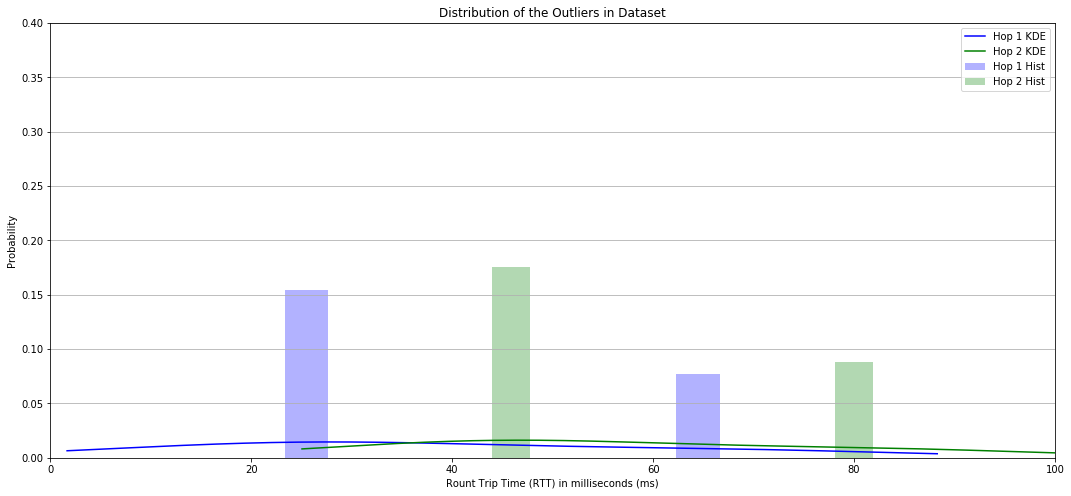

In [7]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in outliers1.keys():
    outliers1[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    outliers1[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Outliers in Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Visualize network topology

../plots_analysis.py:94: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['node_id'] = addr['node_id'].convert_objects(convert_numeric=True)
../plots_analysis.py:110: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../plots_analysis.py:125: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rpl['node_id'] = rpl['node_id'].convert_objects(convert_numeric=True)


<Figure size 432x288 with 0 Axes>

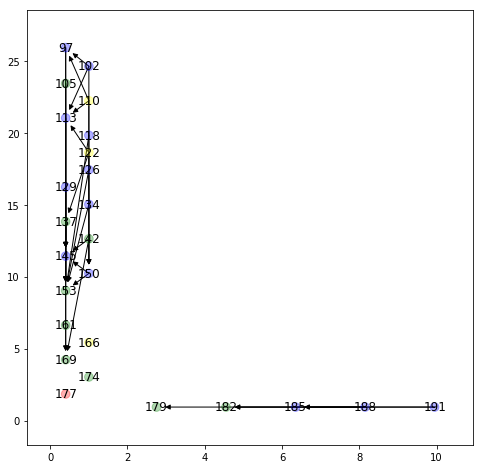

In [8]:
G1 = plots_analysis.produce_iotlab_topology(os.getcwd() + '/traces/', '2019-01JAN-30-1')
                                            
plt.clf()
fig = plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G1, pos=nx.get_node_attributes(G1,'loc'), node_shape='.', node_color=list(nx.get_node_attributes(G1,'color').values()), alpha=0.3)
nx.draw_networkx_labels(G1, pos=nx.get_node_attributes(G1,'loc'), labels=nx.get_node_attributes(G1,'id'))
nx.draw_networkx_edges(G1, pos=nx.get_node_attributes(G1,'loc'))
                                            
plt.show()
                                            

## Disconnection of 1 node
Parse the 2nd trace file with 200 packets over a network with 1 node disconnection (node 169).

In [18]:
hop_nodes2 = trace_analysis.process_iotlab_aggregated(os.getcwd() + '/traces/', '2019-01JAN-30-1b169')
std_values2, outliers2 = trace_analysis.separate_outliers(hop_nodes2)

../trace_analysis.py:363: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)


Considering the clean data, produce a histogram of delay depending on the hop-distance from the root 

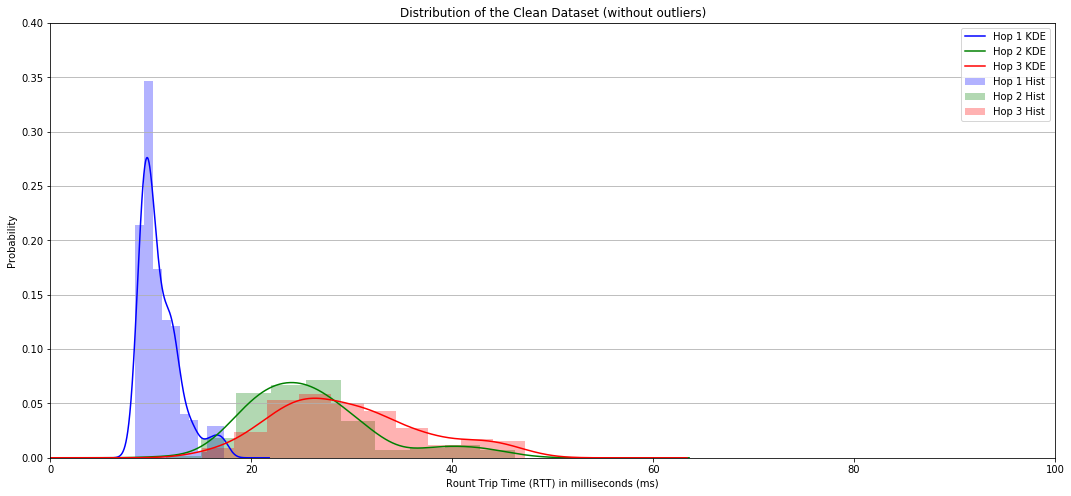

In [19]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in std_values2.keys():
    std_values2[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    std_values2[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset (without outliers)')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Examine original data

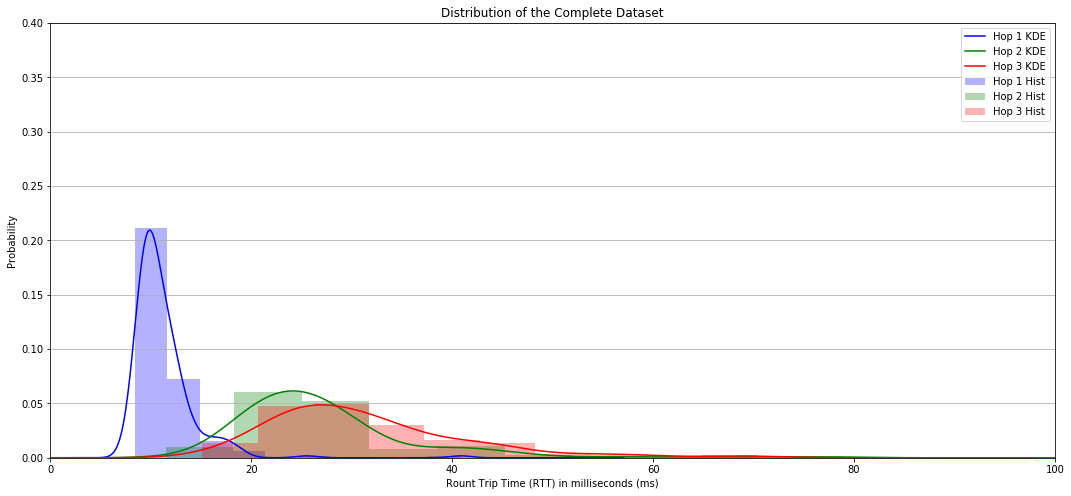

In [20]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes2.keys():
    hop_nodes2[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes2[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Complete Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

../trace_analysis.py:274: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['node_id'] = addr['node_id'].convert_objects(convert_numeric=True)
../trace_analysis.py:290: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:305: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rpl['node_id'] = rpl['node_id'].convert_objects(convert_numeric=True)


<Figure size 432x288 with 0 Axes>

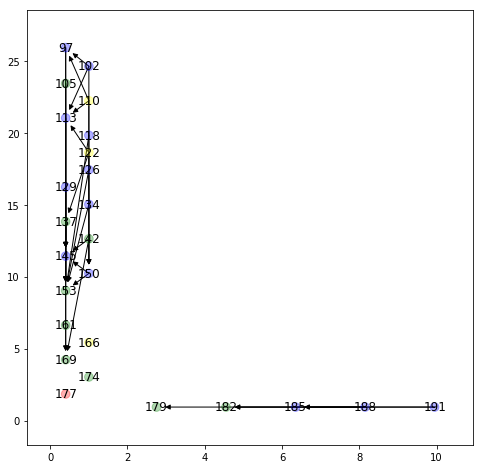

In [22]:
G1b = plots_analysis.produce_iotlab_topology(os.getcwd() + '/traces/', '2019-01JAN-30-1b169')

plt.clf()
fig = plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G1, pos=nx.get_node_attributes(G1,'loc'), node_shape='.', node_color=list(nx.get_node_attributes(G1,'color').values()), alpha=0.3)
nx.draw_networkx_labels(G1, pos=nx.get_node_attributes(G1,'loc'), labels=nx.get_node_attributes(G1,'id'))
nx.draw_networkx_edges(G1, pos=nx.get_node_attributes(G1,'loc'))
plt.show()

## Additional 2 node disconnections
Parse the 3rd trace file with 200 packets over a network with 2 additional nodes are disconnected. Now a total of 3 nodes are offline (node 153,169,182).

In [23]:
hop_nodes3 = trace_analysis.process_iotlab_aggregated(os.getcwd() + '/traces/', '2019-01JAN-30-1b169b153b182')
std_values3, outliers3 = trace_analysis.separate_outliers(hop_nodes3)

../trace_analysis.py:363: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)


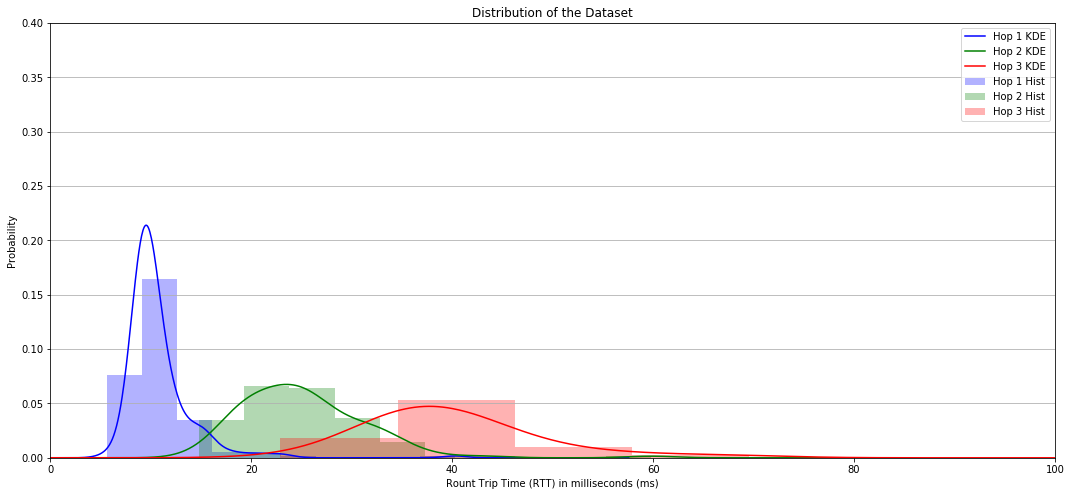

In [24]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes3.keys():
    hop_nodes3[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes3[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

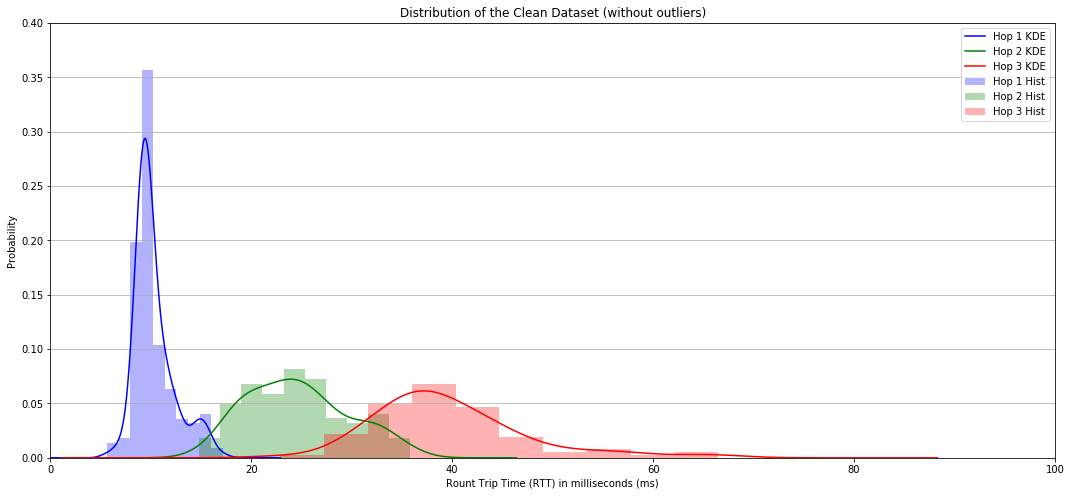

In [25]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in std_values3.keys():
    std_values3[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    std_values3[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset (without outliers)')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

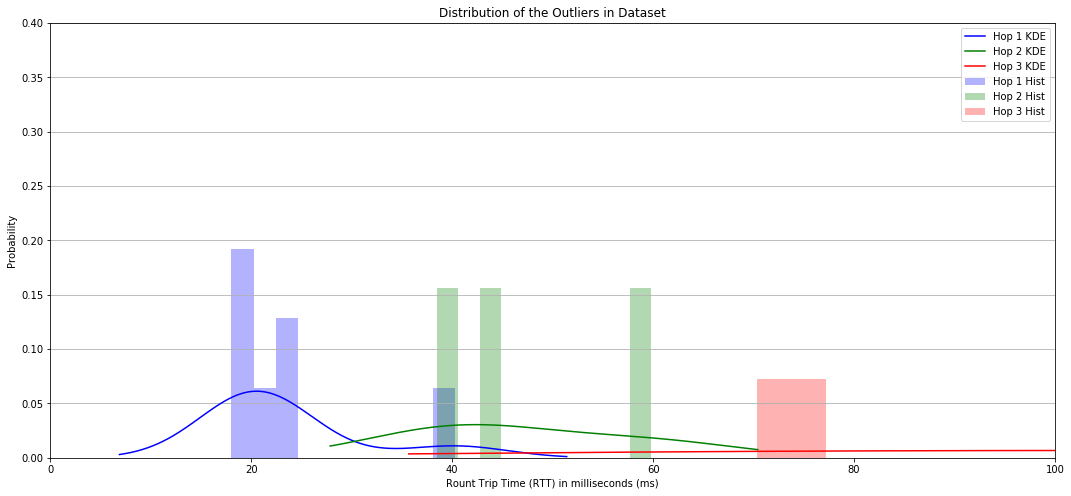

In [26]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in outliers3.keys():
    outliers3[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    outliers3[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Outliers in Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Visualize network topology

../trace_analysis.py:274: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['node_id'] = addr['node_id'].convert_objects(convert_numeric=True)
../trace_analysis.py:290: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:305: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rpl['node_id'] = rpl['node_id'].convert_objects(convert_numeric=True)


<Figure size 432x288 with 0 Axes>

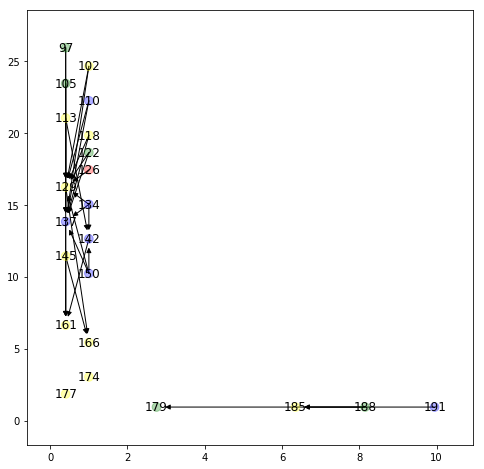

In [27]:
G3 = plots_analysis.produce_iotlab_topology(os.getcwd() + '/traces/', '2019-01JAN-30-1b169b153b182')

plt.clf()
fig = plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G3, pos=nx.get_node_attributes(G3,'loc'), node_shape='.', node_color=list(nx.get_node_attributes(G3,'color').values()), alpha=0.3)
nx.draw_networkx_labels(G3, pos=nx.get_node_attributes(G3,'loc'), labels=nx.get_node_attributes(G3,'id'))
nx.draw_networkx_edges(G3, pos=nx.get_node_attributes(G3,'loc'))
plt.show()

## Nodes are re-activated
Parse the 4th trace file with 200 packets when 3 nodes (153,169,182) are re-activated.

In [28]:
hop_nodes4 = trace_analysis.process_iotlab_aggregated(os.getcwd() + '/traces/', '2019-01JAN-30-2')
std_values4, outliers4 = trace_analysis.separate_outliers(hop_nodes4)

../trace_analysis.py:363: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)


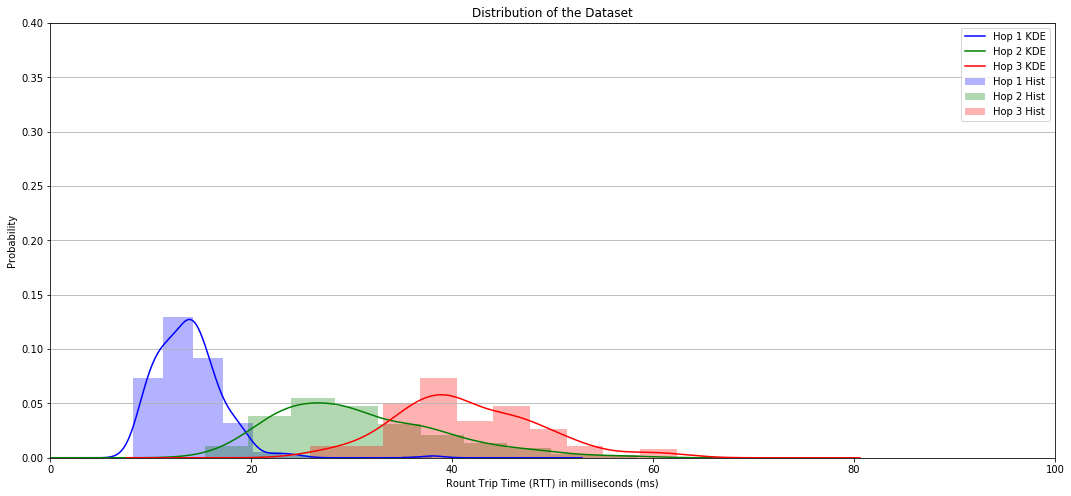

In [29]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes4.keys():
    hop_nodes4[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes4[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

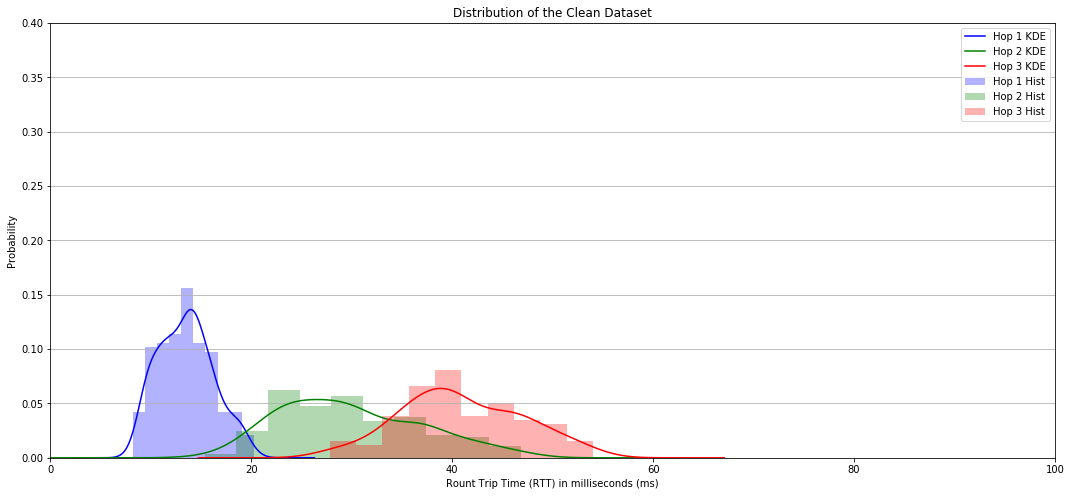

In [30]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in std_values4.keys():
    std_values4[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    std_values4[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

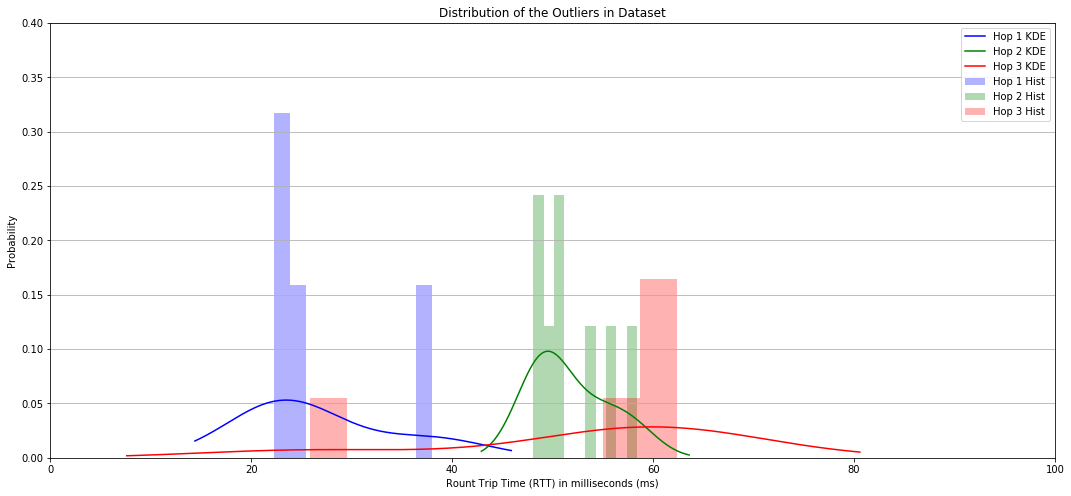

In [31]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in outliers4.keys():
    outliers4[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    outliers4[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Outliers in Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Visualize network topology

../trace_analysis.py:274: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['node_id'] = addr['node_id'].convert_objects(convert_numeric=True)
../trace_analysis.py:290: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:305: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rpl['node_id'] = rpl['node_id'].convert_objects(convert_numeric=True)


<Figure size 432x288 with 0 Axes>

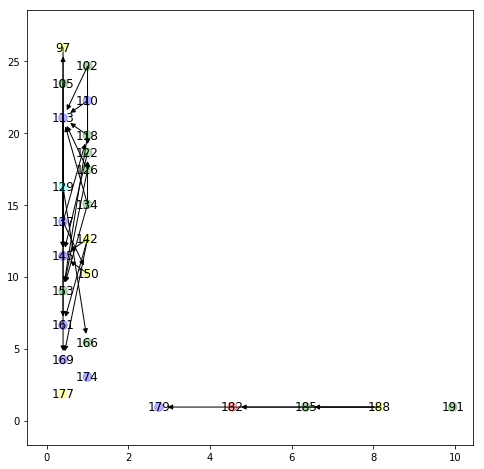

In [32]:
G4 = plots_analysis.produce_iotlab_topology(os.getcwd() + '/traces/', '2019-01JAN-30-2')

plt.clf()
fig = plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G4, pos=nx.get_node_attributes(G4,'loc'), node_shape='.', node_color=list(nx.get_node_attributes(G4,'color').values()), alpha=0.3)
nx.draw_networkx_labels(G4, pos=nx.get_node_attributes(G4,'loc'), labels=nx.get_node_attributes(G4,'id'))
nx.draw_networkx_edges(G4, pos=nx.get_node_attributes(G4,'loc'))
plt.show()

## 5 Nodes are de-activated
Parse the 5th trace file with 200 packets when 5 nodes (113,122,145,166,185) are de-activated.

In [33]:
hop_nodes5 = trace_analysis.process_iotlab_aggregated(os.getcwd() + '/traces/', '2019-01JAN-30-3b113b122b145b166b185')
std_values5, outliers5 = trace_analysis.separate_outliers(hop_nodes5)

../trace_analysis.py:363: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)


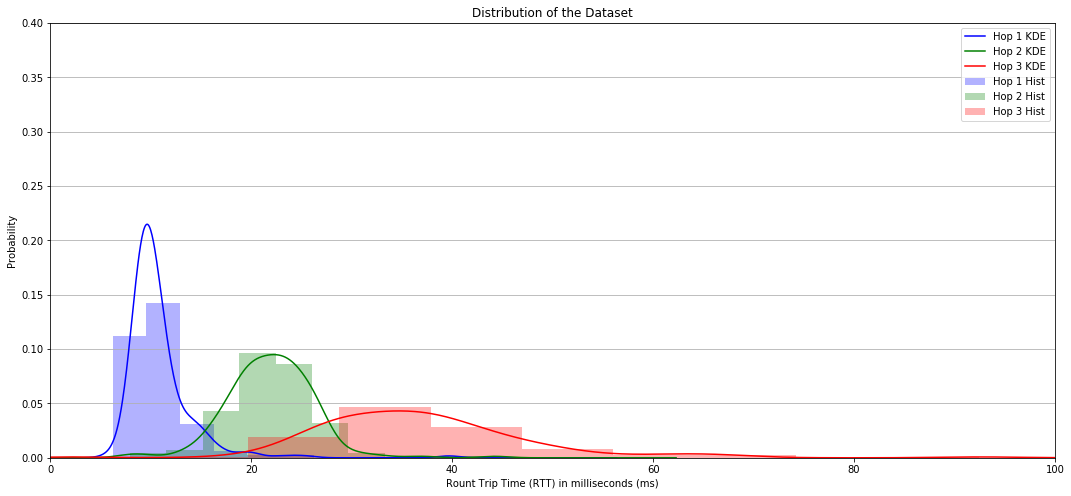

In [34]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes5.keys():
    hop_nodes5[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes5[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

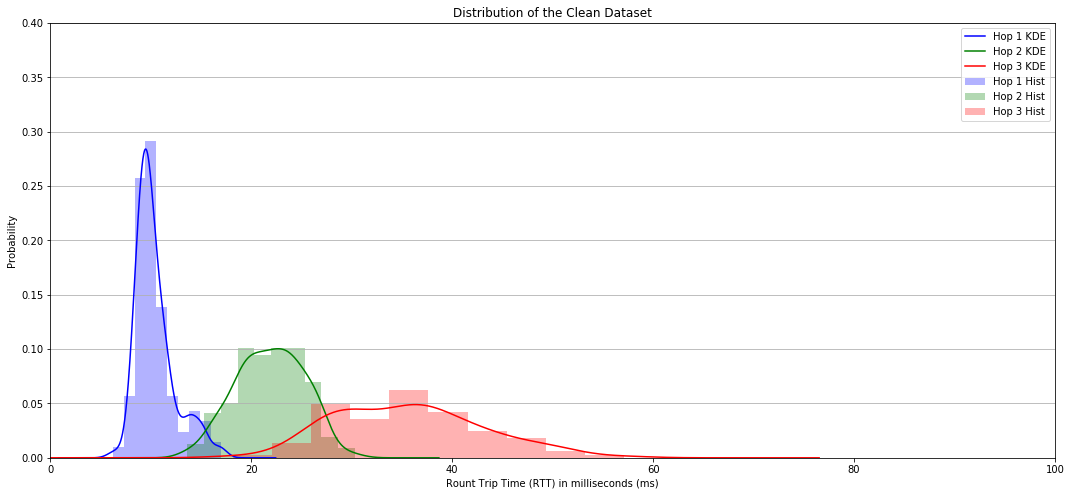

In [35]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in std_values5.keys():
    std_values5[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    std_values5[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

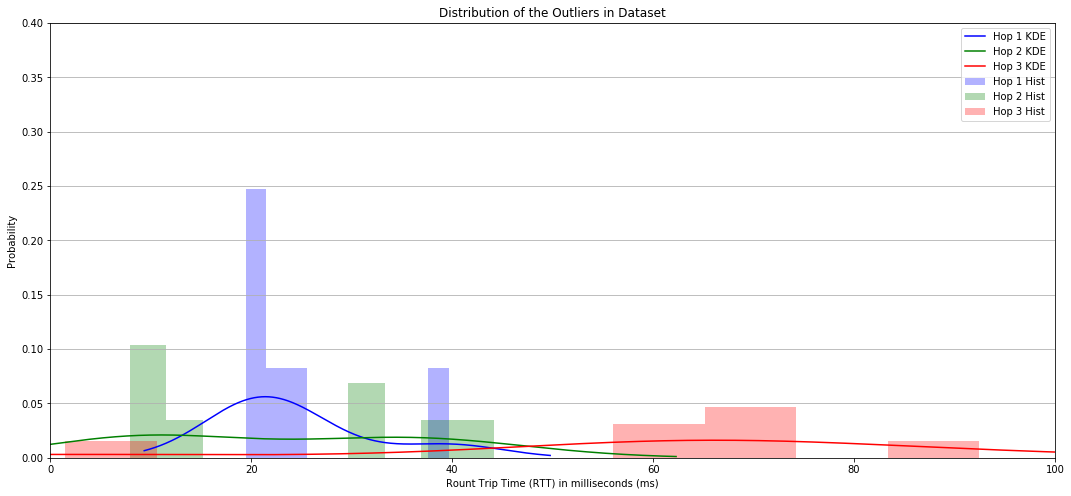

In [36]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in outliers5.keys():
    outliers5[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    outliers5[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Outliers in Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

../plots_analysis.py:94: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['node_id'] = addr['node_id'].convert_objects(convert_numeric=True)
../plots_analysis.py:110: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../plots_analysis.py:125: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rpl['node_id'] = rpl['node_id'].convert_objects(convert_numeric=True)


<Figure size 432x288 with 0 Axes>

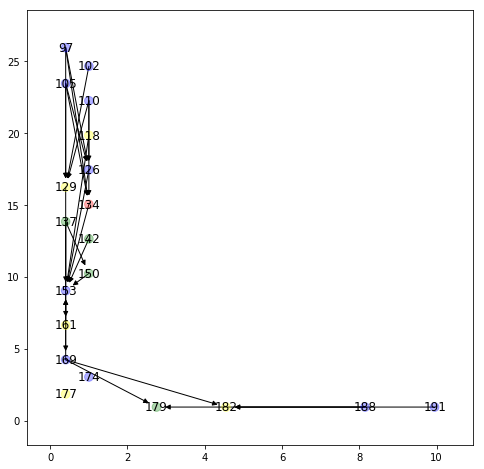

In [9]:
G5 = plots_analysis.produce_iotlab_topology(os.getcwd() + '/traces/', '2019-01JAN-30-3b113b122b145b166b185')

plt.clf()
fig = plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G5, pos=nx.get_node_attributes(G5,'loc'), node_shape='.', node_color=list(nx.get_node_attributes(G5,'color').values()), alpha=0.3)
nx.draw_networkx_labels(G5, pos=nx.get_node_attributes(G5,'loc'), labels=nx.get_node_attributes(G5,'id'))
nx.draw_networkx_edges(G5, pos=nx.get_node_attributes(G5,'loc'))
plt.show()